## CMPINF2100 - Final Project PPG Customer Churn (Main Notebook)

### Introduction: 

This project's goal is to predict if some customer will churn (or stop buying) with some probability. The data set that is used comes from the company's sales transaction history. This is an important project because it could help the company decide on retition activities based on the predicted customers that are churning. 

This project is a CLASSIFICATION PROBLEM. I did not have to convert a regression problem to a classification problem, since churn was the outcome.



Some major findings I have found while executing this project was that `total_day_minutes` was significantally affected based on if the customer churned or not. Also, those that have an international plan have a higher proportion of churn rate than those that did not. Some states do seem to have a higher proportion as well (i.e. California). A big influence on if they churned was how many customer service calls, specifically if they made more than 3 calls. Whe making more than 3 calls, it was about a 50/50 chance if they would churn or not. 

Major findings when I did cluster analysis was that the cluster with the highest proportion of churning also had the highest mean of `total_day_minutes`. Also, this cluster had the highest count of international calls, given that they did not have a voicemail plan.

When creating models and prediciting, applying the sin function to `total_day_minutes` increased the accuracy of the model. However, the biggest finding was that the two models I used for prediction showed me similar results. The results were that there is a higher chance of churning when the customer made greater than 3 customer service calls, AND that there is a positive relationship between `total_day_minutes` and `churn`. Another interesting finding here was the the two models had different formulas, but they both showed the three same variables that were the most statistically significant.


The inputs that seemed to influence churn was `group_number_customer_service_calls` (specifically the "other" category), the sin of `total_day_minutes`, and `total_day_minutes`.

EDA, predicitive models, and cluster analysis supported this conclusion.

EDA did help identify similar trends, and the clustering results were consistent from the predictive models with identifying `total_day_minutes`, but not the `group_number_customer_service_calls` finding.

I gained a lot of skills when doing this project, especially diagnosing error codes and deciding the best way to carry out a specific procedure. I also learned how to identify the bigger picture on what a graph or model is telling me. 

I can take the curiousity of what models, clustering, or visuals are telling you and dig deeper. I also know have a strong understanding in Classification problems, so in the future if there is a specific area that requires classification analysis, I feel confident in my abilities due to this project. 


## EDA

### Import modules:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

### Read Data

In [2]:
churn_df = pd.read_csv('ppg_churn_data.csv')

In [3]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   object 
 3   international_plan             5000 non-null   object 
 4   voice_mail_plan                5000 non-null   object 
 5   number_vmail_messages          5000 non-null   int64  
 6   total_day_minutes              5000 non-null   float64
 7   total_day_calls                5000 non-null   int64  
 8   total_day_charge               5000 non-null   float64
 9   total_eve_minutes              5000 non-null   float64
 10  total_eve_calls                5000 non-null   int64  
 11  total_eve_charge               5000 non-null   float64
 12  total_night_minutes            5000 non-null   f

### Basic Exploration:

In [4]:
churn_df.shape

(5000, 20)

This shows that this dataset contains 20 columns and 5000 rows

In [5]:
churn_df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

Above is a list of all the columns (variable names) and their associated data types

In [6]:
churn_df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

This shows that there are NO MISSING VALUES in the dataset

In [7]:
churn_df.nunique()

state                              51
account_length                    218
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              48
total_day_minutes                1961
total_day_calls                   123
total_day_charge                 1961
total_eve_minutes                1879
total_eve_calls                   126
total_eve_charge                 1659
total_night_minutes              1853
total_night_calls                 131
total_night_charge               1028
total_intl_minutes                170
total_intl_calls                   21
total_intl_charge                 170
number_customer_service_calls      10
churn                               2
dtype: int64

Above shows the number of unique values for each variable

Look at the value counts for `number_customer_service_calls` since there are only 10 counts 

In [8]:
churn_df.number_customer_service_calls.value_counts()

number_customer_service_calls
1    1786
2    1127
0    1023
3     665
4     252
5      96
6      34
7      13
9       2
8       2
Name: count, dtype: int64

Since there are only 10 unique values for this variable change it's data type to non-numeric

In [9]:
churn_df['number_customer_service_calls'] = churn_df.number_customer_service_calls.astype('object')

In [10]:
churn_df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls     object
churn                             object
dtype: object

I will look at the summary statistics for all variables.

In [11]:
churn_df.describe()

account_length  number_vmail_messages  total_day_minutes  \
count      5000.00000            5000.000000        5000.000000   
mean        100.25860               7.755200         180.288900   
std          39.69456              13.546393          53.894699   
min           1.00000               0.000000           0.000000   
25%          73.00000               0.000000         143.700000   
50%         100.00000               0.000000         180.100000   
75%         127.00000              17.000000         216.200000   
max         243.00000              52.000000         351.500000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      5000.000000       5000.000000        5000.000000      5000.000000   
mean        100.029400         30.649668         200.636560       100.191000   
std          19.831197          9.162069          50.551309        19.826496   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.375000        87.000000   
50%         100.000000         30.620000         201.000000       100.000000   
75%         113.000000         36.750000         234.100000       114.000000   
max         165.000000         59.760000         363.700000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       5000.000000          5000.000000        5000.000000   
mean          17.054322           200.391620          99.919200   
std            4.296843            50.527789          19.958686   
min            0.000000             0.000000           0.000000   
25%           14.140000           166.900000          87.000000   
50%           17.090000           200.400000         100.000000   
75%           19.900000           234.700000         113.000000   
max           30.910000           395.000000         175.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         5000.000000         5000.000000       5000.000000   
mean             9.017732           10.261780          4.435200   
std              2.273763            2.761396          2.456788   
min              0.000000            0.000000          0.000000   
25%              7.510000            8.500000          3.000000   
50%              9.020000           10.300000          4.000000   
75%             10.560000           12.000000          6.000000   
max             17.770000           20.000000         20.000000   

       total_intl_charge  
count        5000.000000  
mean            2.771196  
std             0.745514  
min             0.000000  
25%             2.300000  
50%             2.780000  
75%             3.240000  
max             5.400000

### Visualizations

#### Counts of categorical variables:

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


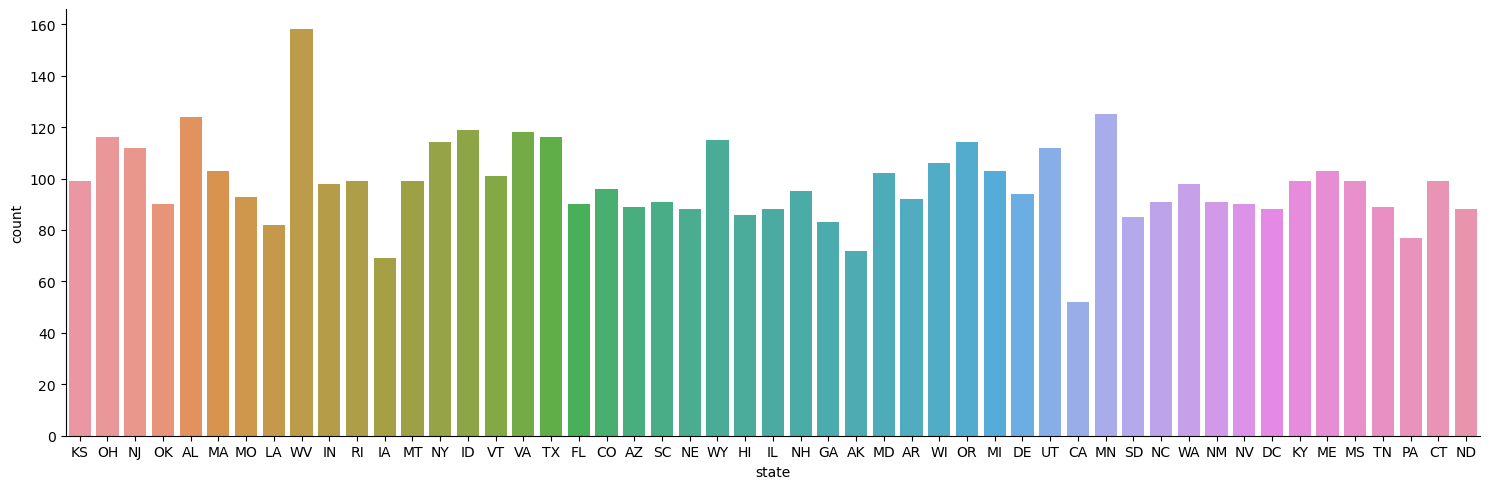

In [12]:
sns.catplot(data = churn_df, x='state', kind='count', aspect=3)

plt.show()

This graph shows the counts for each state that the customer is located in. Therefore we can see that West Virginia is the most frequent state a customer is in.

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


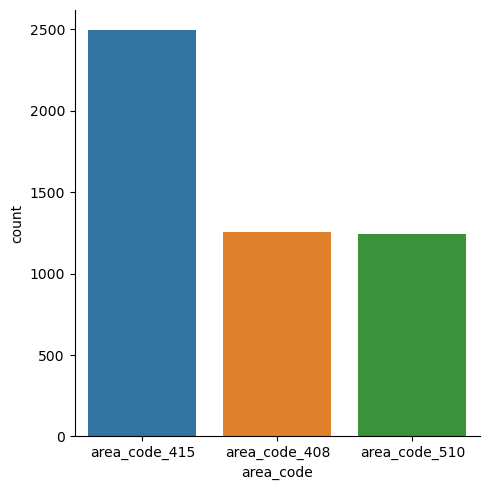

In [13]:
sns.catplot(data= churn_df, x='area_code', kind='count')

plt.show()

This shows the count for area code that the service center is in. The visual shows that there are more service centers in area code 415 compared to the other area codes. 

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


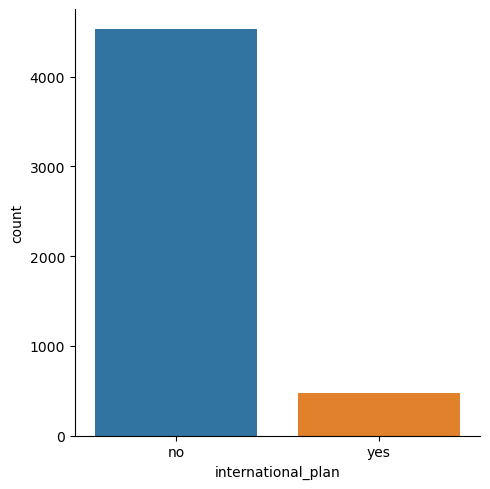

In [14]:
sns.catplot(data = churn_df, x='international_plan', kind='count')

plt.show()

Most customer do NOT have an international plan, so this variable is very imbalanced

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


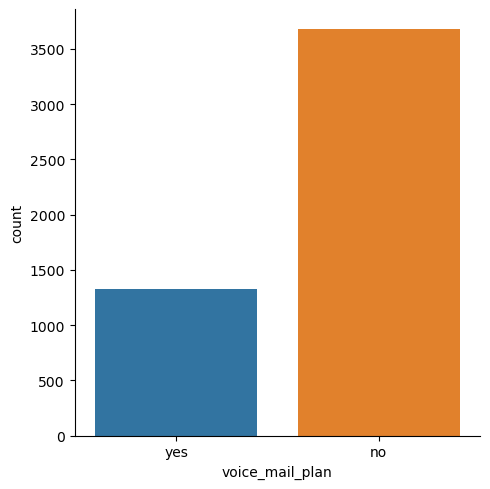

In [15]:
sns.catplot(data = churn_df, x='voice_mail_plan', kind='count')

plt.show()

This is also imbalanced, although not as much as `international_plan`. This shows most people do NOT have a voicemail plan set up.

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


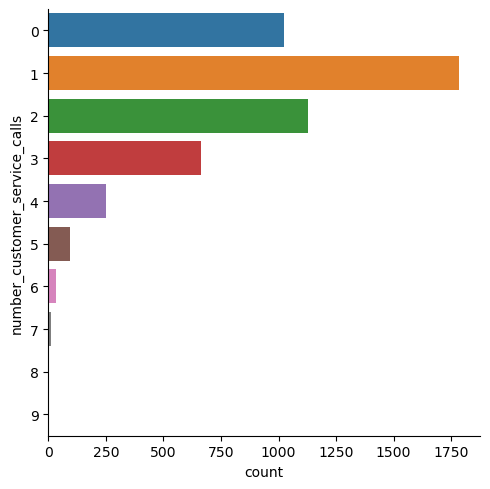

In [16]:
sns.catplot(data=churn_df, y='number_customer_service_calls', kind='count')
plt.show()

Most of the data fall within the range 0-3 for number of times customers called customer service. This would be a good canidate to group.

In [17]:
churn_df['group_number_customer_service_calls'] = churn_df['number_customer_service_calls'].where( churn_df['number_customer_service_calls'] <= 3, other='Other')

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


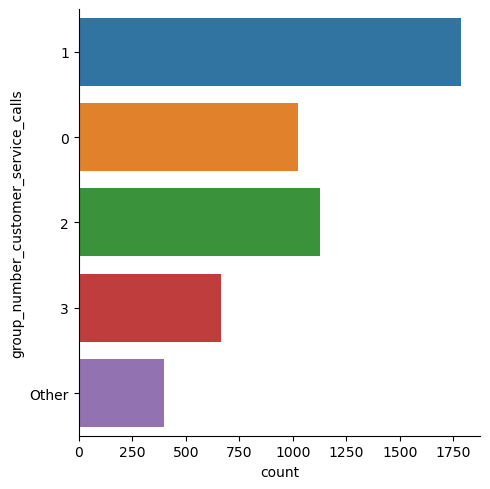

In [18]:
sns.catplot(data=churn_df, y='group_number_customer_service_calls', kind='count')
plt.show()

Now that we grouped 4-9 together, there is not as much as an imbalance with the variable.

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


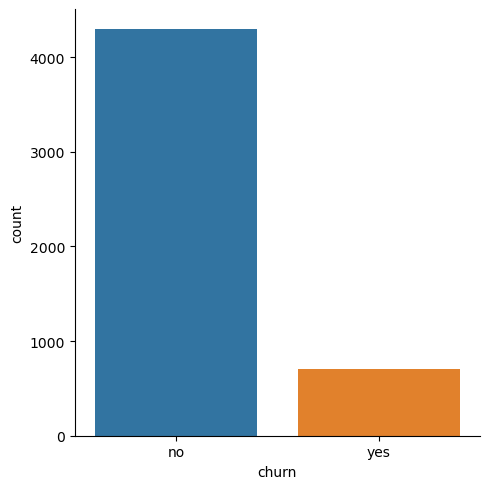

In [19]:
sns.catplot(data = churn_df, x='churn', kind='count')

plt.show()

`churn` is also very imbalanced, which is good because it shows a lot of customers do not churn from the company.

Check the normalzied value counts for `churn`:

In [20]:
churn_df.churn.value_counts(normalize=True)

churn
no     0.8586
yes    0.1414
Name: proportion, dtype: float64

About 14% of customers churned in this dataset

#### Distributions of continuous variables:

Convert data to long format to visualize marginal distributions

In [21]:
churn_seaborn = churn_df.select_dtypes('number').copy()

In [22]:
churn_lf = churn_seaborn.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid'])

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


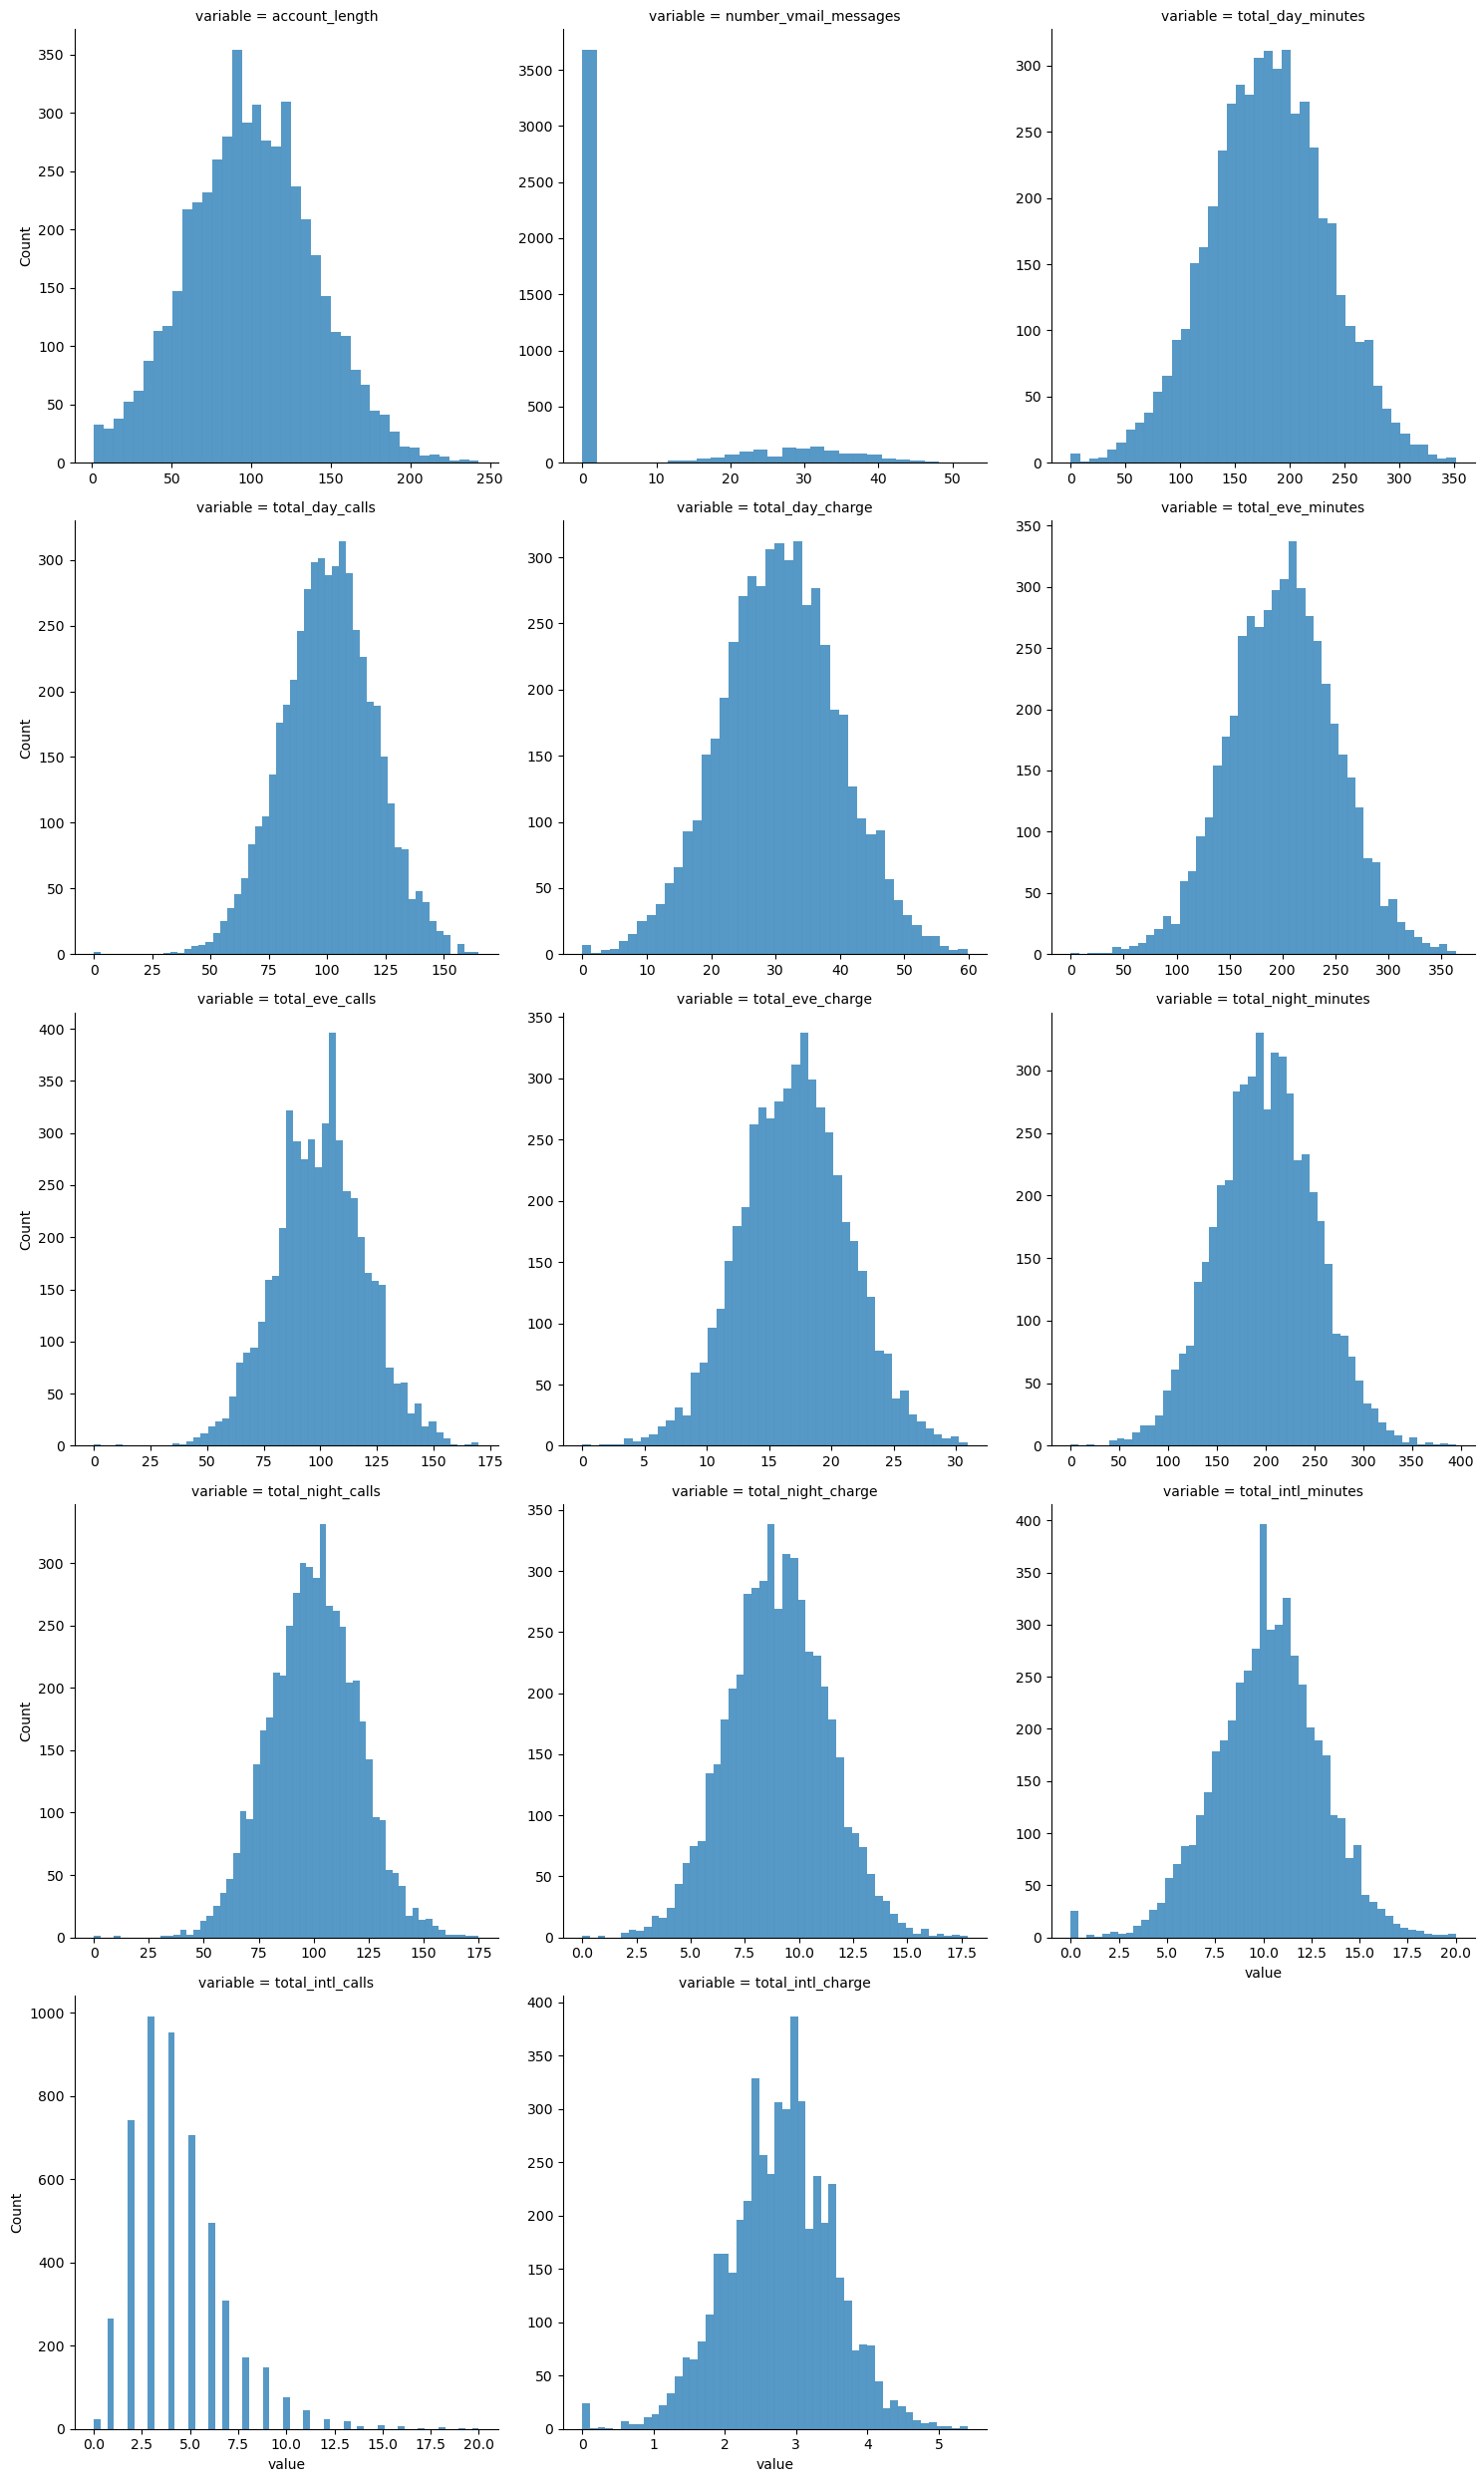

In [23]:
sns.displot(data=churn_lf, x='value', col='variable', kind='hist',
           facet_kws={'sharex':False, 'sharey':False},
           common_bins=False, col_wrap=3)

plt.show()

From these visuals, it seems like most of the variables are normally distributed, except for `number_vmail_messages` and `total_intl_calls`. It is also interesting to see that `total_day_calls`, `total_eve_calls`, and `total_night_calls` have very similar ranges and fequencies. For example, most of the calls, whether it was made during the day, evening, or night is between 90-110. I would've expected `total_eve_calls` and `total_night_calls` to have a higher value than `total_day_call` since a majority of people work during the day.

Since `number_vmail_messages` has a very high frequency of the value 0 compared to other values, it would be good to cut this variable to fix the distribution shape. I will cut three times, one for low number, one for medium values, and one for large values:

In [24]:
churn_df.number_vmail_messages.max()

52

The max number of voice mail messages is 52, so that is where we will make the cut off.

In [25]:
churn_df['bin_number_vmail_messages'] = pd.cut(churn_df.number_vmail_messages, [0, 3, 25, 52], include_lowest=True, labels = ['low', 'medium', 'high'])

I cut it so the low number of voicemails is between 0-3, medium is between 4-25, and high is between 26-52

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


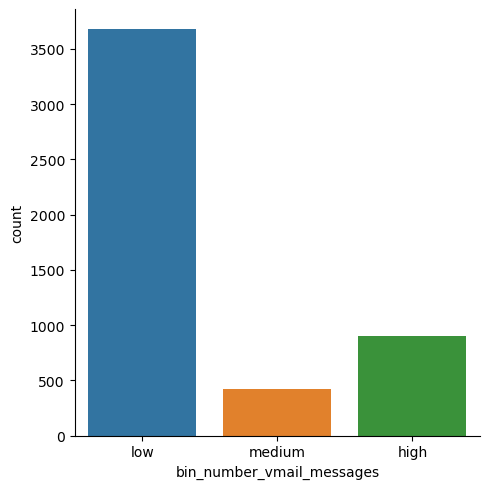

In [26]:
sns.catplot(data=churn_df, x='bin_number_vmail_messages', kind='count')

plt.show()

Now I will split `total_int_calls` into bins since it has a high density between 3-5:

In [27]:
churn_df['bin_total_intl_calls'] = pd.qcut(churn_df.total_intl_calls, q = 4)

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


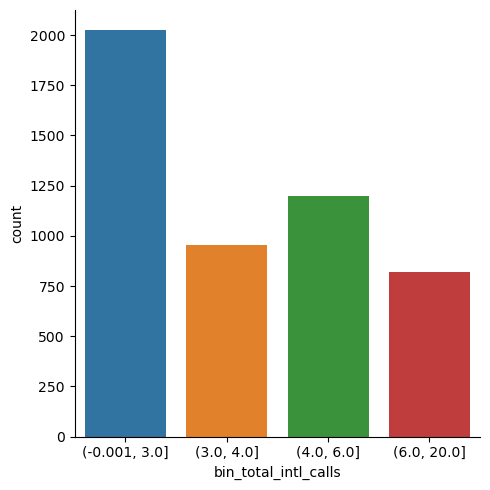

In [28]:
sns.catplot(data = churn_df, x='bin_total_intl_calls', kind='count')
plt.show()

#### Relationships between continuous variables:

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


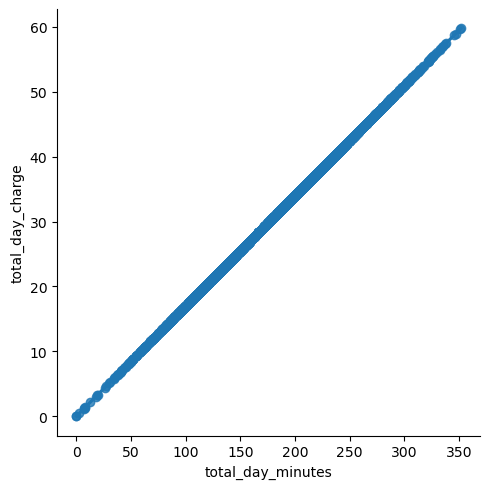

In [29]:
sns.lmplot(data = churn_df, x='total_day_minutes', y='total_day_charge')

plt.show()

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


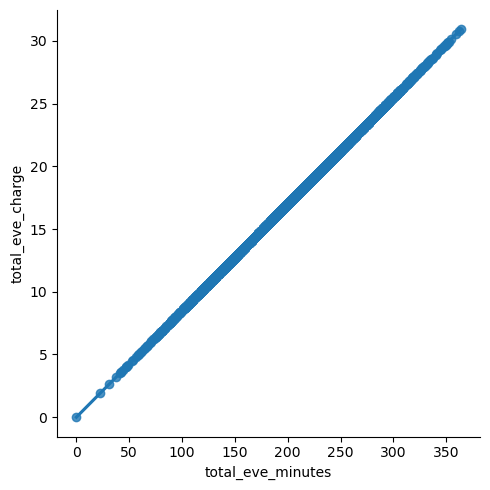

In [30]:
sns.lmplot(data = churn_df, x='total_eve_minutes', y='total_eve_charge')

plt.show()

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


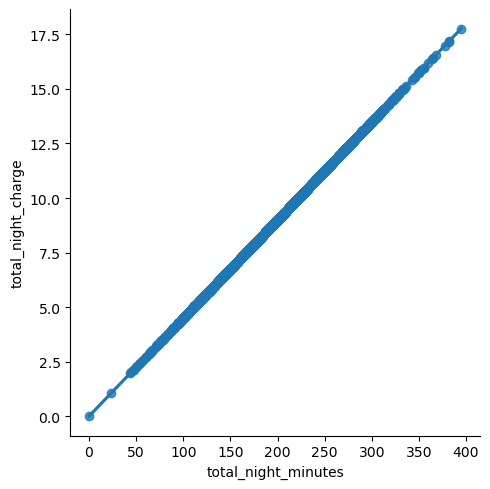

In [31]:
sns.lmplot(data = churn_df, x='total_night_minutes', y='total_night_charge')

plt.show()

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


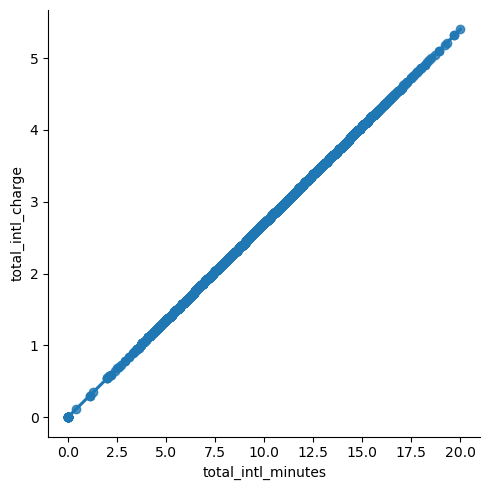

In [32]:
sns.lmplot(data = churn_df, x='total_intl_minutes', y='total_intl_charge')

plt.show()

All the minute and charge variables are heavily correlated with one another. Check how correlated they are:

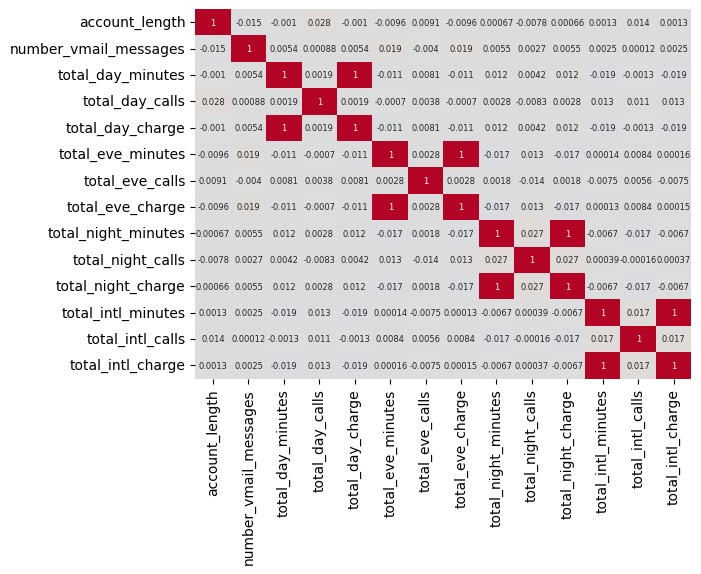

In [33]:
fig, ax = plt.subplots()

sns.heatmap(data=churn_df.corr(numeric_only=True),  
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm', cbar=False,
            annot=True, annot_kws={'size':6},
           ax=ax)
plt.show()

They are perfectly correlated!!!

#### Summaries of continuous variables grouped by categorical variables:

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


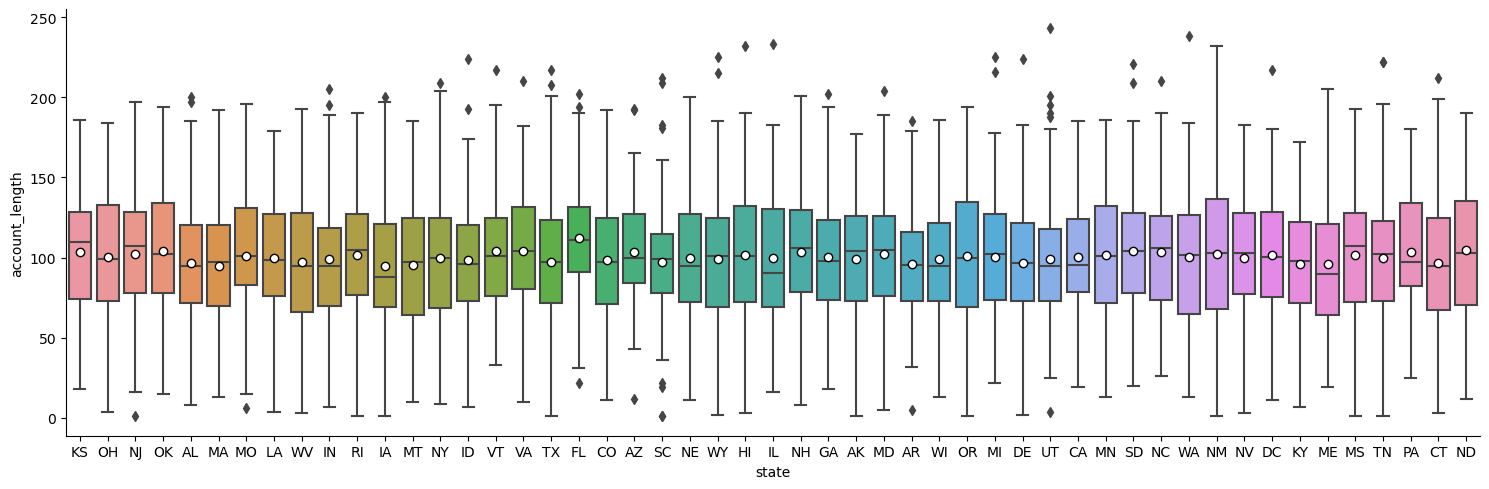

In [34]:
sns.catplot(data = churn_df, x='state', y='account_length', kind='box', aspect=3, showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black'})

plt.show()

The variance varies for account length depending on the state, but not by much. Also, the mean looks roughly even across states.

#### Classification Outcome breakdown by continuous variables:

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


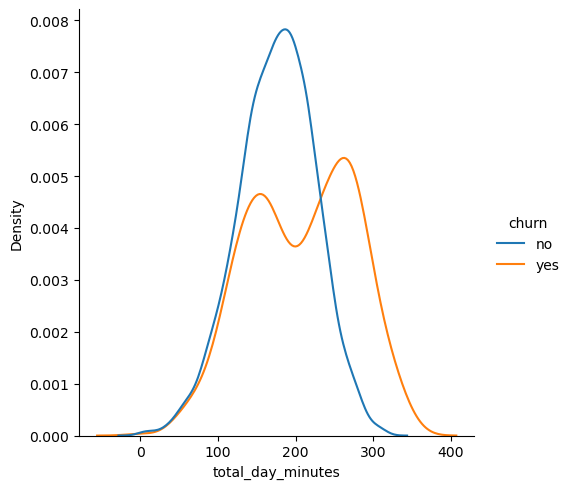

In [35]:
sns.displot(data = churn_df, x='total_day_minutes', hue='churn', kind='kde', common_norm=False)

plt.show()

The distribution for `total_day_minutes` grouped by `churn` is interesting...

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


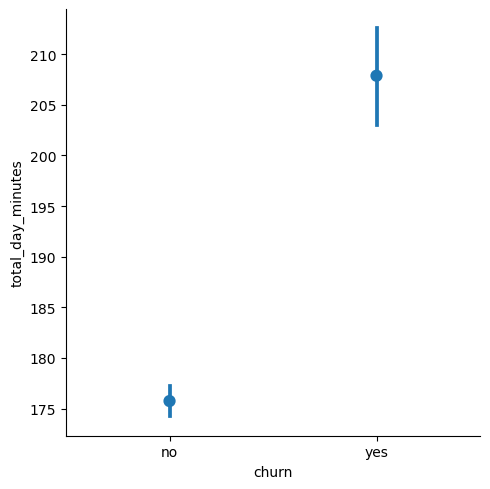

In [36]:
sns.catplot(data=churn_df, x='churn', y='total_day_minutes', kind='point', join=False)

plt.show()

This shows that there is a significant difference in means for `total_day_minutes` based on if the customer churned or not. This is showign that if the customer churned, the total minutes spend during the day is generally higher than if the customer did not churn.

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


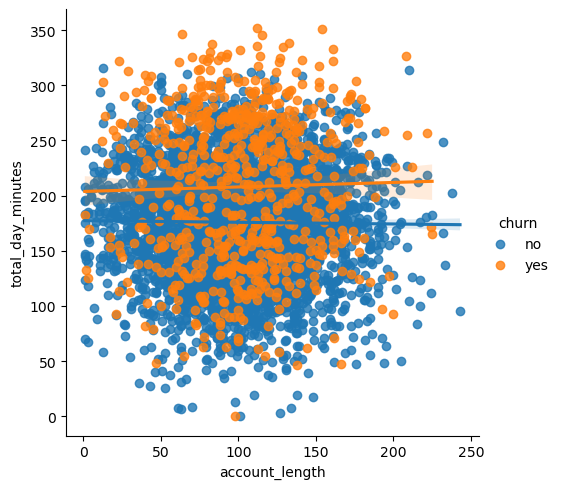

In [37]:
sns.lmplot(data=churn_df, x='account_length', y='total_day_minutes', hue='churn')
plt.show()

The relationships do not change in the  linear model plot. However, when customers do churn, they usually have a higher value for `total_day_minutes`, which I showed earlier in a point plot.

#### Count number of observations for each combination of outcome value and categorical value:

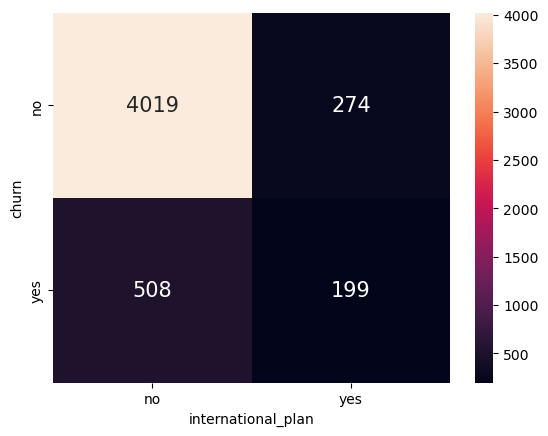

In [38]:
fig, ax = plt.subplots()

sns.heatmap(pd.crosstab(churn_df.churn, churn_df.international_plan),
            annot=True, annot_kws={'fontsize': 15}, fmt='d',
            ax=ax)

plt.show()

Looks like the proportion of customers that churned are a lot higher for those that have an international plan than those who do not. Let's double check this:

In [39]:
churn_df.groupby(['churn'])['international_plan'].value_counts(normalize=True)

churn  international_plan
no     no                    0.936175
       yes                   0.063825
yes    no                    0.718529
       yes                   0.281471
Name: proportion, dtype: float64

About 28% of customers with an internation plan churn, compared to only 6% that do not have an international plan!!!!!!!!!

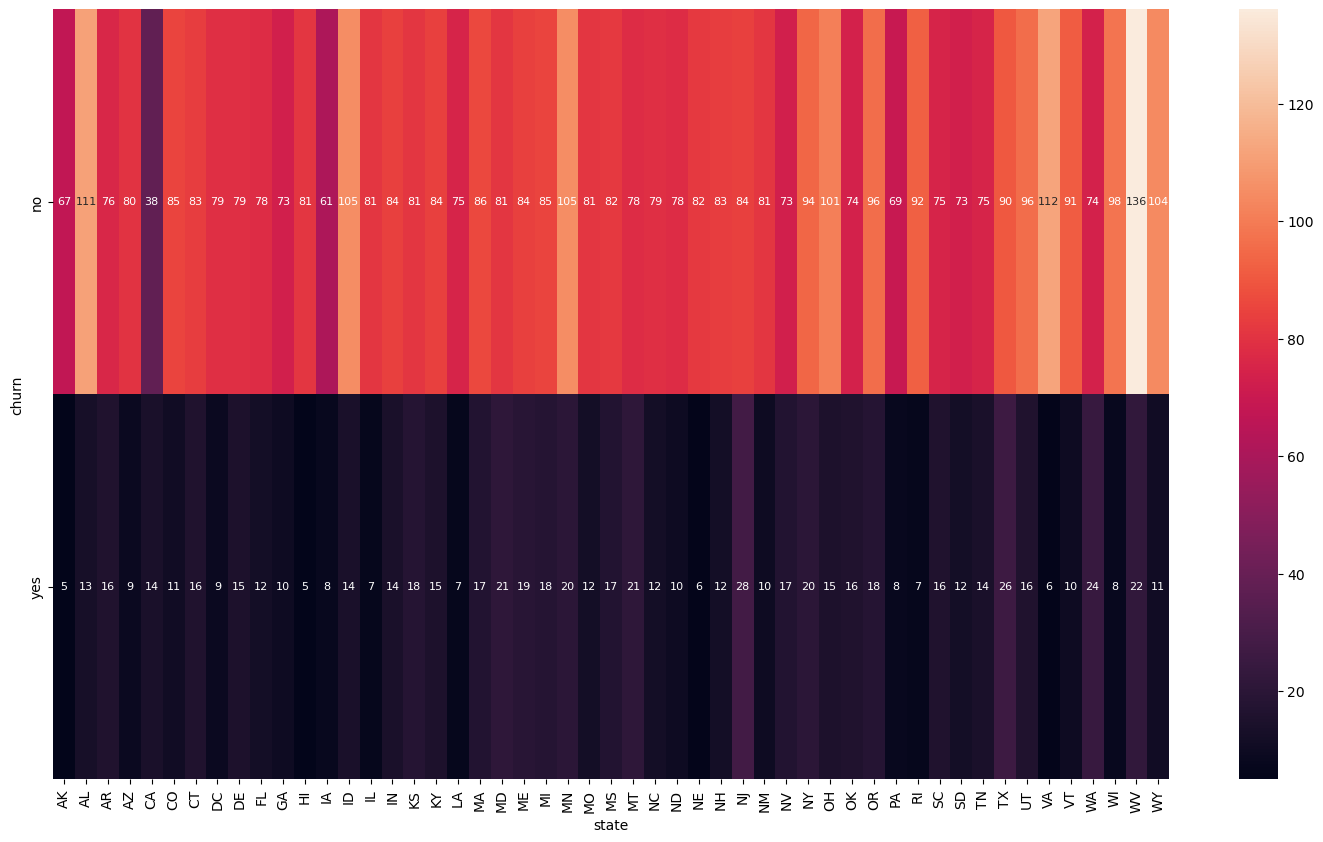

In [40]:
fig, ax = plt.subplots(figsize=(18,10))

sns.heatmap(pd.crosstab(churn_df.churn, churn_df.state),
            annot=True, annot_kws={'fontsize': 8}, fmt='d',
            ax=ax)

plt.show()

A couple states stick out where they have a higher proportion of churn comapred to others. One example is the state California.

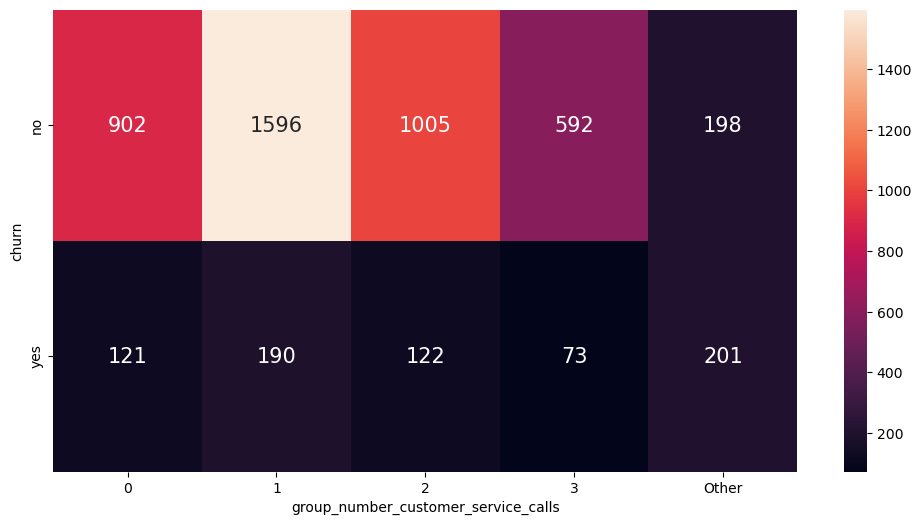

In [41]:
fig, ax = plt.subplots(figsize=(12,6))

sns.heatmap(pd.crosstab(churn_df.churn, churn_df.group_number_customer_service_calls),
            annot=True, annot_kws={'fontsize': 15}, fmt='d',
            ax=ax)

plt.show()

This makes sense, the more a customer calls customer service, the more likely they are to have churned. However, one interesting thing to note is that the 1, 2, and 3 number of customer service groups do not have a significantally higher proportion of churn compared to 0 calls.

### Clustering

Gather all the numeric columns only for HIERARCHICAL clustering analysis. But first import modules we need

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy

Check if we need to standardize

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


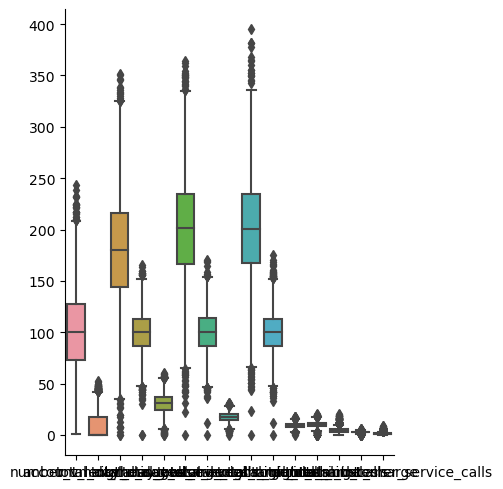

In [43]:
sns.catplot(data=churn_df, kind='box')
plt.show()

SCALES ARE NOT THE SAME so we need to STANDARDIZE FEATURES

In [44]:
churn_feature = churn_df.select_dtypes('number').copy()

In [45]:
X_churn = StandardScaler().fit_transform(churn_feature)

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


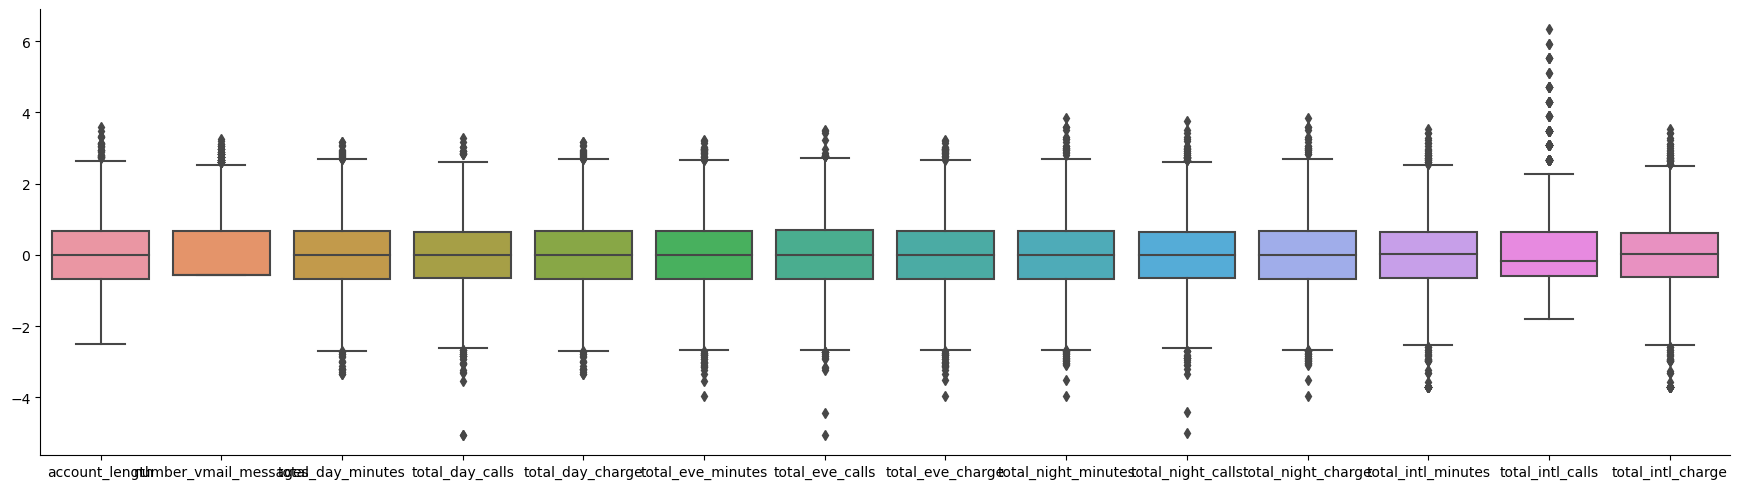

In [46]:
sns.catplot(data = pd.DataFrame(X_churn, columns=churn_feature.columns), kind='box', aspect=3.5)
plt.show()

Since I showed earlier than the `total_minutes` and `total_charge` variables are correlated 1:1 I will drop one of them from the data.

In [47]:
churn_feature = churn_feature.drop(columns=['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']).copy()

As mentioned previously, there are 2 columns that are not gaussian distributions (`number_vmail_messages` and `total_intl_calls`). Since I already manipulated the `number_vmail_messages` to be a categorical variable I will drop it and I will log transform `total_intl_calls`, but add two to each value since there are 0's for some of the values.

In [48]:
churn_feature = churn_feature.drop(columns=['number_vmail_messages'])

In [49]:
churn_feature['log_total_intl_calls'] = np.log(churn_feature.total_intl_calls.add(2))

Now drop total_intl_calls since we have the log of i t

In [50]:
churn_feature = churn_feature.drop(columns=['total_intl_calls'])

Now execute PCA to streamline visualizations

In [51]:
pca_churn = PCA(n_components=2).fit_transform(churn_feature)

In [52]:
pca_churn_df = pd.DataFrame(pca_churn, columns=['pc01', 'pc02'])

In [53]:
pca_churn_df

pc01       pc02
0     -88.736681  21.503974
1      12.579955  43.441050
2     -66.202490  22.682312
3    -130.522773  80.029722
4       9.778379  29.663982
...          ...        ...
4995  -62.694458  42.448157
4996    0.136818 -30.738351
4997   35.426256  32.926607
4998  -13.461174  36.032772
4999   61.179765 -71.990745

[5000 rows x 2 columns]

Now I will use a knee bend plot to identify optimal number of clusters

In [54]:
tots_within = []
K = range(1,31)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500).fit( X_churn)
    tots_within.append( km.inertia_)
    

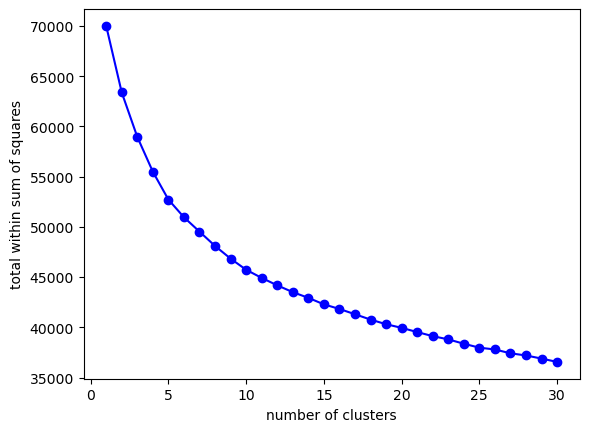

In [55]:
fig, ax = plt.subplots()

ax.plot(K, tots_within, 'bo-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')
plt.show()

This shows that the optimal number of clusters is roughly 5, but for hierarchichal clustering I do not need to specify the number of clusters

Ward Method:

In [56]:
hclust_ward = hierarchy.ward(X_churn)

In [57]:
pca_churn_df['hclust_5'] = pd.Series( hierarchy.cut_tree( hclust_ward, n_clusters=5).ravel(), index= pca_churn_df.index).astype('category')

In [58]:
pca_churn_df

pc01       pc02 hclust_5
0     -88.736681  21.503974        0
1      12.579955  43.441050        0
2     -66.202490  22.682312        1
3    -130.522773  80.029722        1
4       9.778379  29.663982        2
...          ...        ...      ...
4995  -62.694458  42.448157        0
4996    0.136818 -30.738351        0
4997   35.426256  32.926607        0
4998  -13.461174  36.032772        2
4999   61.179765 -71.990745        1

[5000 rows x 3 columns]

In [59]:
pca_churn_df.hclust_5.value_counts()

hclust_5
4    1623
0    1186
1     859
3     838
2     494
Name: count, dtype: int64

Visualize cluster counts

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


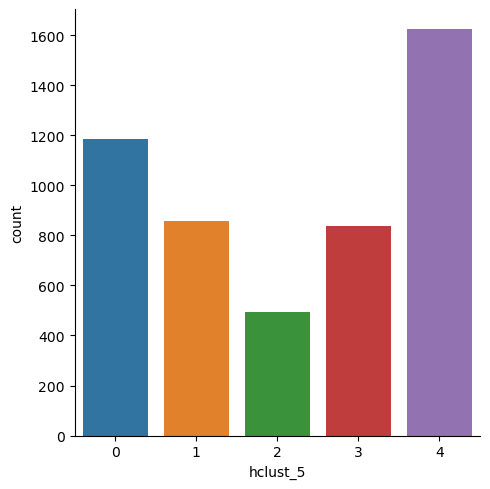

In [60]:
sns.catplot( data = pca_churn_df, x='hclust_5', kind='count')

plt.show()

Cluster 4 has the highest count followed by 0. Cluster 1 and 3 have similar counts and cluster 2 has the smallest count.

See the relationship between the PC's and the clusters

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


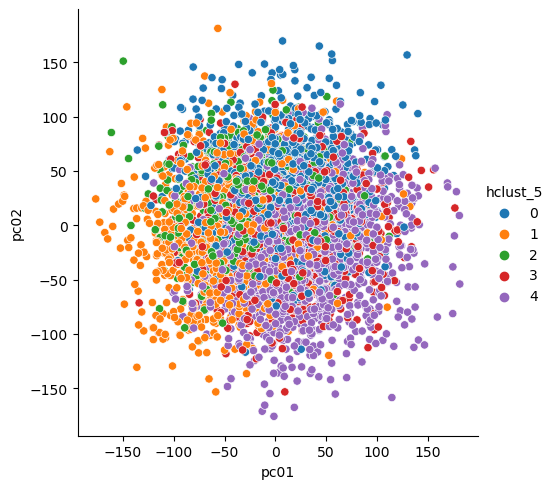

In [61]:
sns.relplot( data= pca_churn_df, x='pc01', y='pc02', hue='hclust_5')
plt.show()

#### Summarize continuous inputs with the clusters:

In [62]:
churn_copy = churn_df.copy()

In [63]:
churn_copy['hclust5'] = pca_churn_df.hclust_5

In [64]:
churn_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   state                                5000 non-null   object  
 1   account_length                       5000 non-null   int64   
 2   area_code                            5000 non-null   object  
 3   international_plan                   5000 non-null   object  
 4   voice_mail_plan                      5000 non-null   object  
 5   number_vmail_messages                5000 non-null   int64   
 6   total_day_minutes                    5000 non-null   float64 
 7   total_day_calls                      5000 non-null   int64   
 8   total_day_charge                     5000 non-null   float64 
 9   total_eve_minutes                    5000 non-null   float64 
 10  total_eve_calls                      5000 non-null   int64   
 11  total_eve_charge 

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


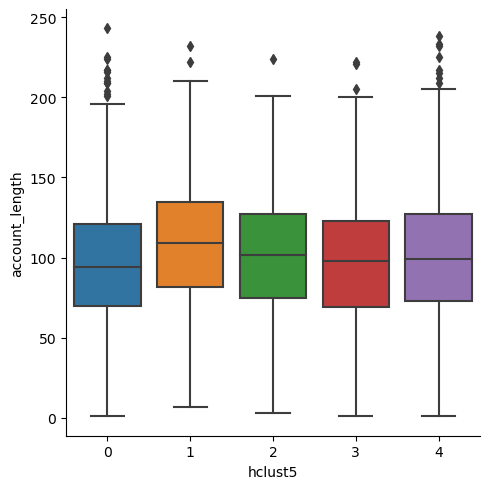

In [65]:
sns.catplot(data=churn_copy, x='hclust5', y='account_length', kind='box')

plt.show()

The summary statistics of account length does not really cahnge based on cluster

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


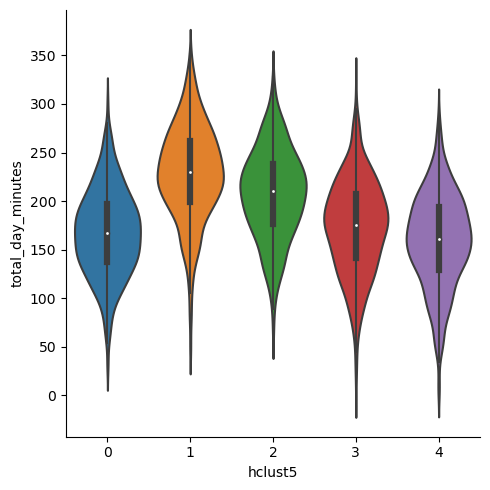

In [66]:
sns.catplot(data=churn_copy, x='hclust5', y='total_day_minutes', kind='violin')

plt.show()

Means and variances seem to vary for total_day_minutes. Check other time variables:

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


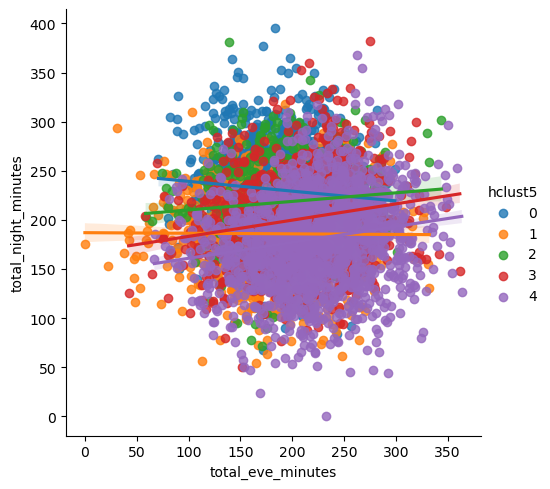

In [67]:
sns.lmplot(data=churn_copy, x='total_eve_minutes', y='total_night_minutes', hue='hclust5')

plt.show()

The relationship between total_night and total_eve minutes vary depending on the cluster. For example, cluster 0 there is a negative relationship, but cluster 3 there is a positive one. 

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


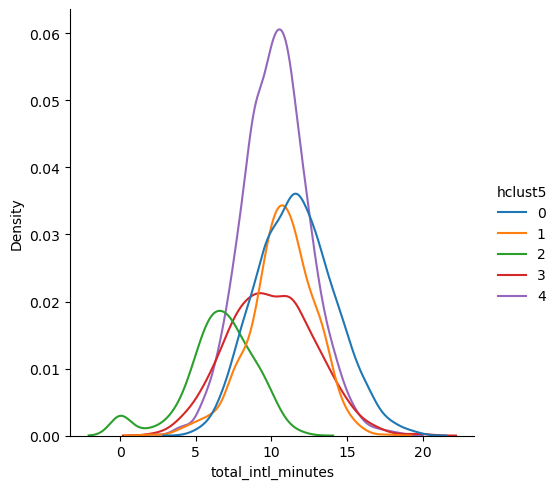

In [68]:
sns.displot(data=churn_copy, x='total_intl_minutes', hue='hclust5', kind='kde')

plt.show()

Looks like cluster 2 has a smaller mean for total interantional mintues than the rest.

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


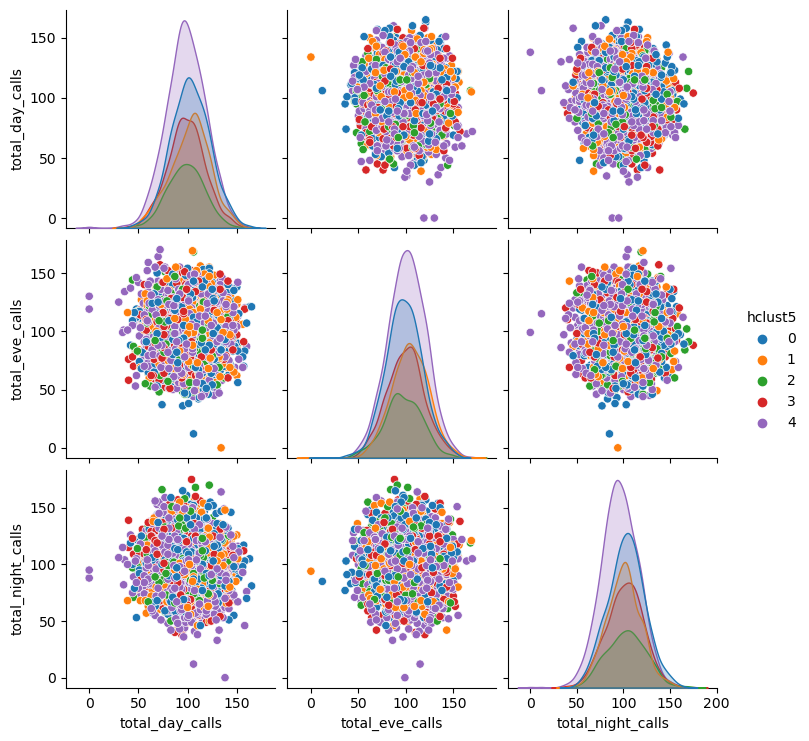

In [69]:
sns.pairplot(data = churn_copy, x_vars=['total_day_calls', 'total_eve_calls', 'total_night_calls'],
            y_vars=['total_day_calls', 'total_eve_calls', 'total_night_calls'], hue='hclust5')

plt.show()

Overall, I do not see anything here. It seems like there is no clear relationship/trend between the time call variables grouped by clusters

#### Explore these clustering results with the categorical inputs:

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


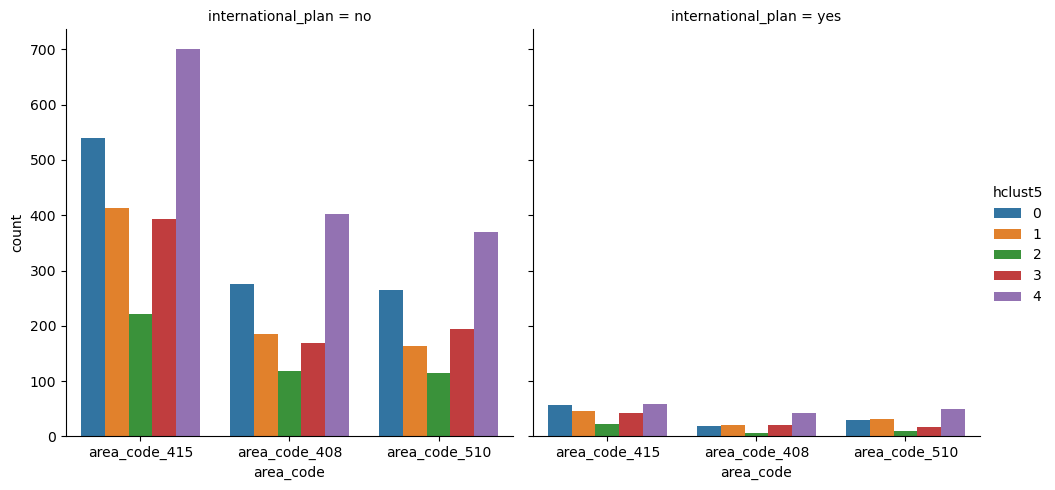

In [70]:
sns.catplot(data=churn_copy, x='area_code', col='international_plan', hue='hclust5', kind='count')

plt.show()

I do not see anything here, it looks like they all the clusters follow roughly the same shape based on area code and international plan


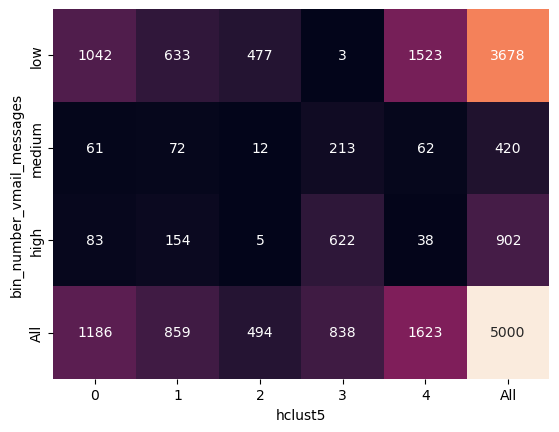

In [71]:
fig, ax = plt.subplots()

sns.heatmap(data= pd.crosstab(churn_copy.bin_number_vmail_messages, churn_copy.hclust5, margins=True),
            annot= True, annot_kws={'fontsize': 10}, fmt='d',
            cbar=False, 
            ax=ax)
plt.show()

Looks like cluster 3 has a high amount of voicemial messages compared to the other clusters

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


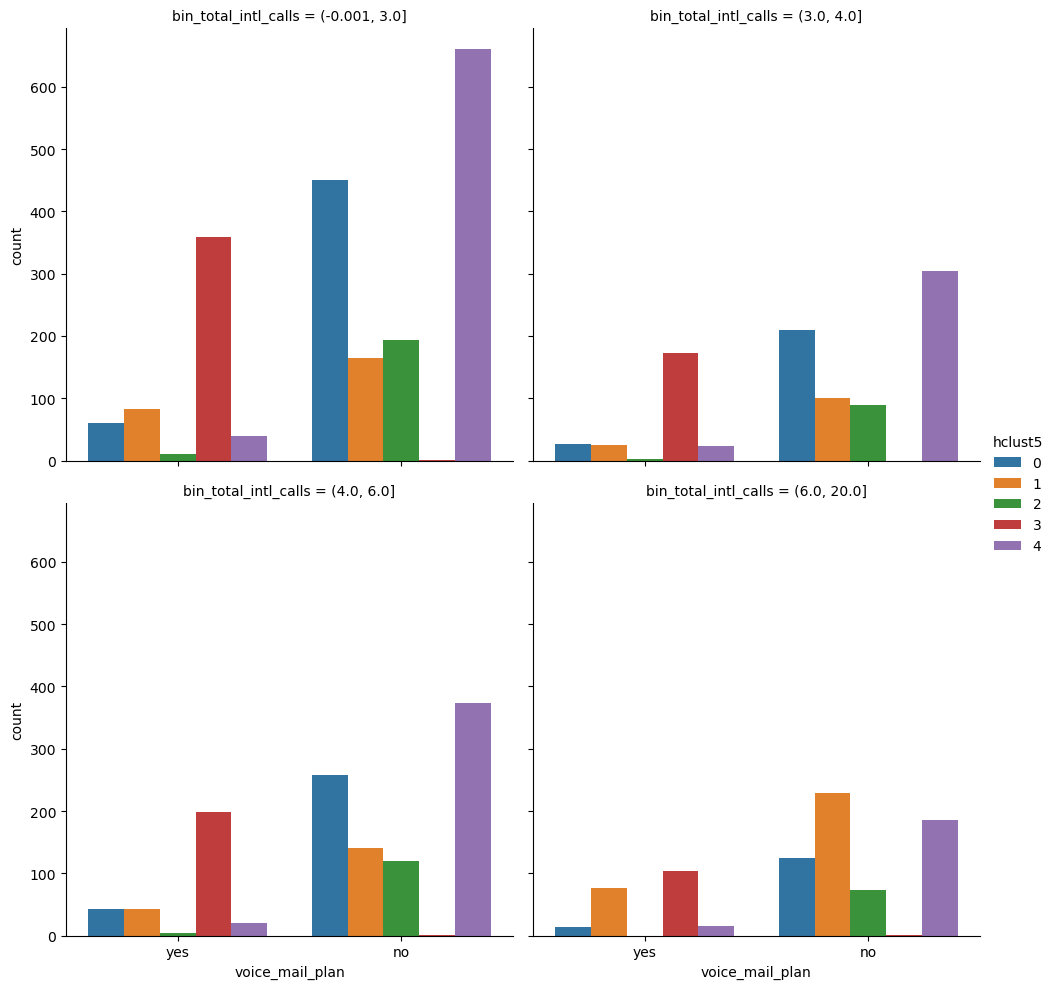

In [72]:
sns.catplot(data=churn_copy, x='voice_mail_plan', col='bin_total_intl_calls', hue='hclust5', kind='count', col_wrap=2)

plt.show()

This visual tells me that cluster 3 has a higher count for voicemail plans than the others. Also, cluster 4 mostly consists of no voice mail plans. Cluster 2 seems to have a high amount of international calls.

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


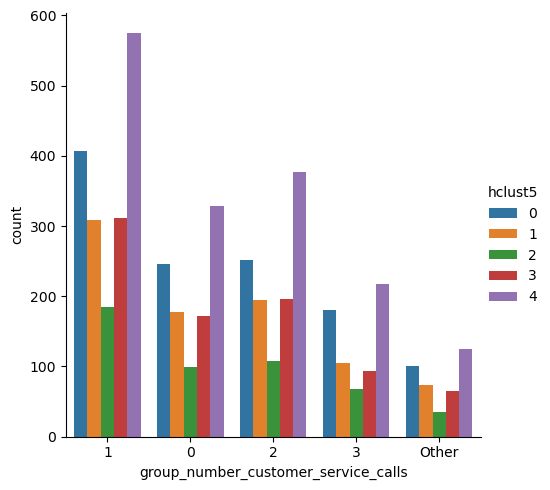

In [73]:
sns.catplot(data=churn_copy, x='group_number_customer_service_calls', hue='hclust5', kind='count')
plt.show()

I do not really see anything that sticks out here. The clusters do not seem to vary based on cluster for number customer service calls

#### Compare cluster assignments to outcome values:

In [74]:
churn_copy['churn'] = churn_df.churn

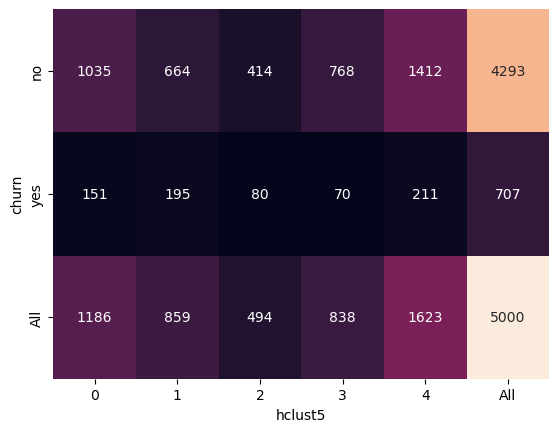

In [75]:
fig, ax = plt.subplots()

sns.heatmap(data= pd.crosstab(churn_copy.churn, churn_copy.hclust5, margins=True),
            annot= True, annot_kws={'fontsize': 10}, fmt='d',
            cbar=False, 
            ax=ax)
plt.show()

It looks like cluster 1 and 2 have a higher proportion of customers that churned compared to the rest. Let's double check this:

In [76]:
churn_copy.churn.value_counts(normalize=True)

churn
no     0.8586
yes    0.1414
Name: proportion, dtype: float64

In [77]:
churn_copy.groupby(['hclust5'])['churn'].value_counts(normalize=True)

hclust5  churn
0        no       0.872681
         yes      0.127319
1        no       0.772992
         yes      0.227008
2        no       0.838057
         yes      0.161943
3        no       0.916468
         yes      0.083532
4        no       0.869994
         yes      0.130006
Name: proportion, dtype: float64

23% of customers churned in cluster 1 and 16% churned in cluster 2, which is above the average (14%) of customers that churned, so my assumption is correct

#### Cluster using the original variables to see if there is a difference between PC's for clustering assignments:

In [78]:
churn_feature['hclust_5'] = pd.Series( hierarchy.cut_tree( hclust_ward, n_clusters=5).ravel(), index= churn_feature.index).astype('category')

In [79]:
churn_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   account_length        5000 non-null   int64   
 1   total_day_minutes     5000 non-null   float64 
 2   total_day_calls       5000 non-null   int64   
 3   total_eve_minutes     5000 non-null   float64 
 4   total_eve_calls       5000 non-null   int64   
 5   total_night_minutes   5000 non-null   float64 
 6   total_night_calls     5000 non-null   int64   
 7   total_intl_minutes    5000 non-null   float64 
 8   log_total_intl_calls  5000 non-null   float64 
 9   hclust_5              5000 non-null   category
dtypes: category(1), float64(5), int64(4)
memory usage: 356.7 KB


C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


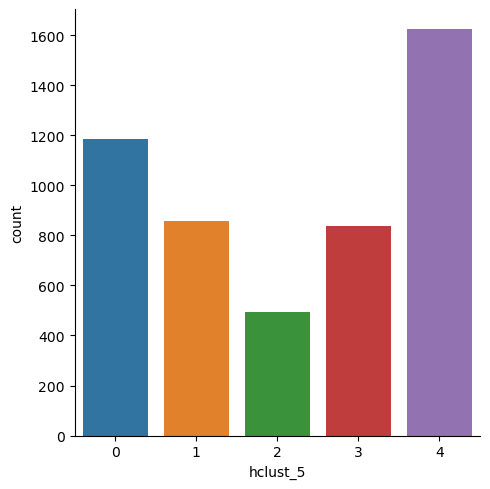

In [80]:
sns.catplot( data = churn_feature, x='hclust_5', kind='count')

plt.show()

In [81]:
churn_copy['hclust_5_original'] = churn_feature.hclust_5

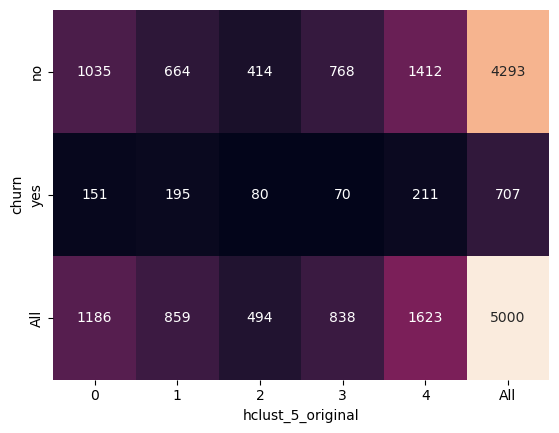

In [82]:
fig, ax = plt.subplots()

sns.heatmap(data= pd.crosstab(churn_copy.churn, churn_copy.hclust_5_original, margins=True),
            annot= True, annot_kws={'fontsize': 10}, fmt='d',
            cbar=False, 
            ax=ax)
plt.show()

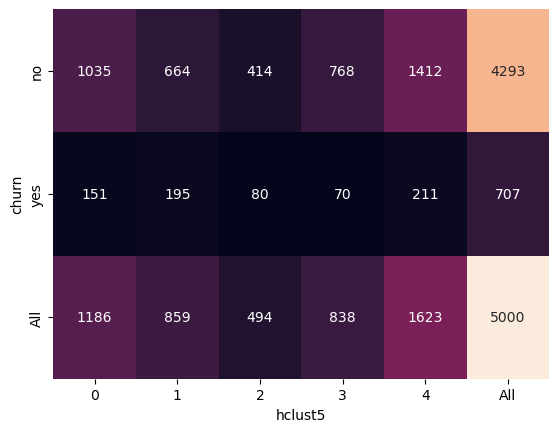

In [83]:
fig, ax = plt.subplots()

sns.heatmap(data= pd.crosstab(churn_copy.churn, churn_copy.hclust5, margins=True),
            annot= True, annot_kws={'fontsize': 10}, fmt='d',
            cbar=False, 
            ax=ax)
plt.show()

The clustering results did NOT CHANGE depending on if I used PCA or used the original variables.

### Model Fitting and Interpretation:

Change the `number_customer_service_calls` column to a numeric column to test the difference between this and the catgory `group_number_customer_service_calls` in the model 

In [84]:
churn_df_new = churn_df.copy()

In [85]:
churn_df_new['number_customer_service_calls'] = churn_df_new['number_customer_service_calls'].astype('float')

Now fix the the non guassian distributions for some of the numeric variables. I will log transform total intl calls but I will filter out 0 for the number voicemail messages variable

In [86]:
churn_df_new['total_intl_calls'] = np.log(churn_df_new.total_intl_calls.add(2))

In [87]:
churn_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   state                                5000 non-null   object  
 1   account_length                       5000 non-null   int64   
 2   area_code                            5000 non-null   object  
 3   international_plan                   5000 non-null   object  
 4   voice_mail_plan                      5000 non-null   object  
 5   number_vmail_messages                5000 non-null   int64   
 6   total_day_minutes                    5000 non-null   float64 
 7   total_day_calls                      5000 non-null   int64   
 8   total_day_charge                     5000 non-null   float64 
 9   total_eve_minutes                    5000 non-null   float64 
 10  total_eve_calls                      5000 non-null   int64   
 11  total_eve_charge 

In [88]:
churn_df_new['number_vmail_messages'] = churn_df_new.loc[churn_df_new.number_vmail_messages > 0 , ['number_vmail_messages']]

log transform number customer service calls now

In [89]:
churn_df_new['number_customer_service_calls'] = np.log(churn_df_new.number_customer_service_calls.add(2))

#### Standardize the continuous variables

In [90]:
churn_numeric = churn_df_new.select_dtypes('number').copy()

In [91]:
standardize = StandardScaler().fit_transform(churn_numeric)

In [92]:
type(standardize)

numpy.ndarray

In [93]:
standardize_df = pd.DataFrame(standardize, columns = churn_numeric.columns)

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


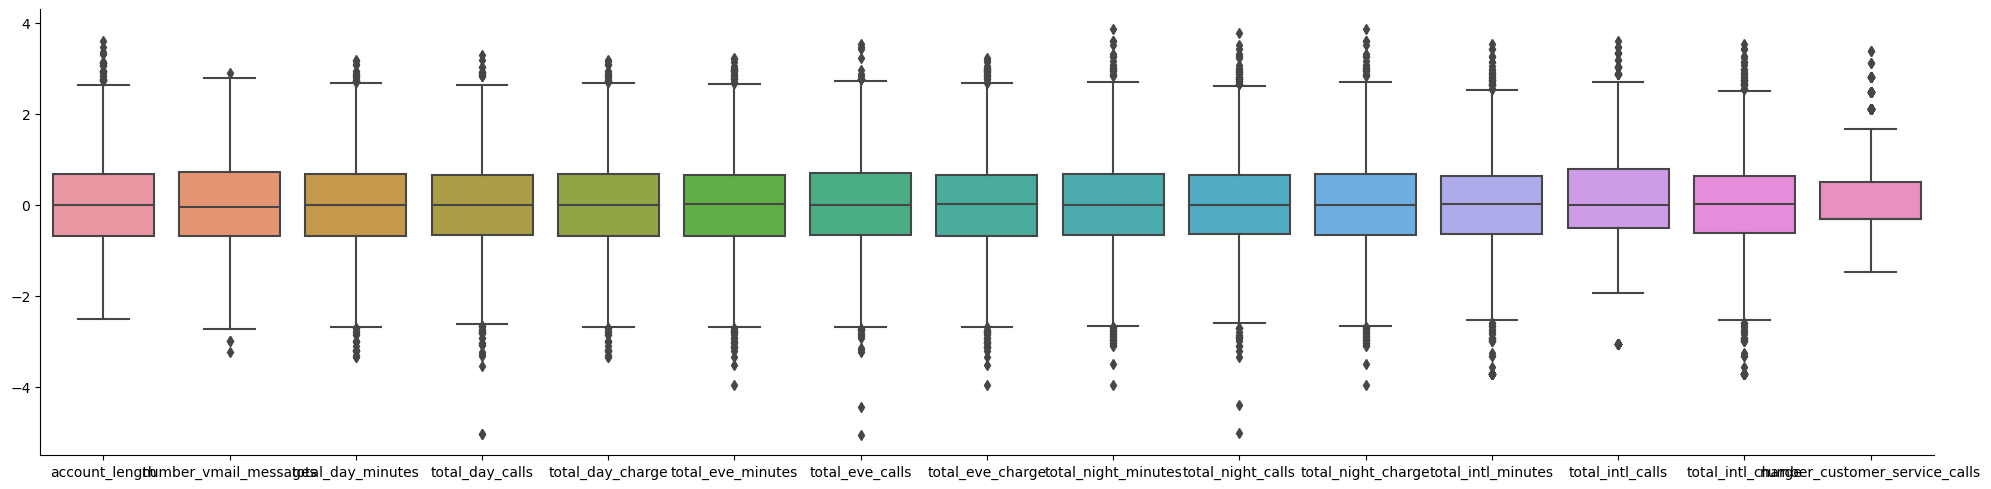

In [98]:
sns.catplot(data =standardize_df, kind='box', aspect=4)
plt.show()

In [96]:
standardize_df.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

Replace the churn_df_new with the standardized values:

In [97]:
churn_df_new[['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge',
              'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
             'total_night_minutes', 'total_night_calls', 'total_night_charge',
             'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']] = standardize_df[['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge',
                                                                                                                                'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
                                                                                                                                'total_night_minutes', 'total_night_calls', 'total_night_charge',
                                                                                                                                'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']]

In [99]:
churn_df_new

state  account_length      area_code international_plan voice_mail_plan  \
0       KS        0.698941  area_code_415                 no             yes   
1       OH        0.169849  area_code_415                 no             yes   
2       NJ        0.925695  area_code_415                 no              no   
3       OH       -0.409634  area_code_408                yes              no   
4       OK       -0.636388  area_code_415                yes              no   
...    ...             ...            ...                ...             ...   
4995    HI       -1.266260  area_code_408                 no             yes   
4996    WV        1.303619  area_code_415                 no              no   
4997    DC       -0.989116  area_code_415                 no              no   
4998    DC        0.220239  area_code_510                 no              no   
4999    VT       -0.359244  area_code_415                 no             yes   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                 -0.554352           1.573802         0.502824   
1                 -0.426365          -0.346802         1.158422   
2                       NaN           1.171125         0.704546   
3                       NaN           2.210292        -1.463971   
4                       NaN          -0.252163         0.654116   
...                     ...                ...              ...   
4995               1.365453           1.028239         1.360145   
4996                    NaN           0.072577        -0.505789   
4997                    NaN          -0.736489        -0.556220   
4998                    NaN           0.157937        -1.665694   
4999               0.597531          -0.944323         0.099379   

      total_day_charge  total_eve_minutes  ...  total_night_calls  \
0             1.574074          -0.064032  ...          -0.446928   
1            -0.347082          -0.101621  ...           0.154374   
2             1.171286          -1.571562  ...           0.204483   
3             2.210457          -2.744745  ...          -0.547145   
4            -0.252115          -1.035419  ...           1.056327   
...                ...                ...  ...                ...   
4995          1.028291           0.442435  ...           0.805785   
4996          0.072080           1.111130  ...           0.655459   
4997         -0.736771          -0.550715  ...          -0.146277   
4998          0.158313          -0.572477  ...          -0.547145   
4999         -0.944168           1.314903  ...           0.004049   

      total_night_charge  total_intl_minutes  total_intl_calls  \
0               0.876286           -0.094809         -0.515789   
1               1.069818            1.245227         -0.515789   
2              -0.746737            0.701969          0.415902   
3              -0.069377           -1.326194          1.111790   
4              -0.267307           -0.058592         -0.515789   
...                  ...                 ...               ...   
4995            1.923114           -0.131027          0.415902   
4996            0.260505            1.607399         -1.133673   
4997            0.238513            1.209010         -0.010941   
4998            0.476029           -0.638067          0.785649   
4999           -0.900682           -0.348330          3.031113   

      total_intl_charge  number_customer_service_calls  churn  \
0             -0.095509                      -0.317455     no   
1              1.245982                      -0.317455     no   
2              0.695971                      -1.471295     no   
3             -1.329681                       0.501207     no   
4             -0.055264                       1.136211     no   
...                 ...                            ...    ...   
4995          -0.135754                       0.501207     no   
4996           1.608185                       1.136211    yes   
4997           1.205738         

Now that numeric variables are standardized I will start building models, but first I will drop the time charge columns, since they are correlated 1:1 wit time minutes columns, and the potential ovefitting that it would have on the model if added.

In [100]:
churn_df_new = churn_df_new.drop(columns=['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'])

In [101]:
churn_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   state                                5000 non-null   object  
 1   account_length                       5000 non-null   float64 
 2   area_code                            5000 non-null   object  
 3   international_plan                   5000 non-null   object  
 4   voice_mail_plan                      5000 non-null   object  
 5   number_vmail_messages                1322 non-null   float64 
 6   total_day_minutes                    5000 non-null   float64 
 7   total_day_calls                      5000 non-null   float64 
 8   total_eve_minutes                    5000 non-null   float64 
 9   total_eve_calls                      5000 non-null   float64 
 10  total_night_minutes                  5000 non-null   float64 
 11  total_night_calls

Change churn to a 1 if it is yes and 0 if it no for logistic modeling

In [102]:
churn_df_new['churn'] = np.where(churn_df_new['churn'] == 'yes', 1, 0)

In [103]:
churn_df_new.churn.value_counts(normalize=True)

churn
0    0.8586
1    0.1414
Name: proportion, dtype: float64

#### Fit an intercept only logistic model:

First I need to import statsmodels

In [104]:
import statsmodels.formula.api as smf

In [105]:
fit_glm_intercept = smf.logit(formula= 'churn ~ 1' , data=churn_df_new).fit()

Optimization terminated successfully.
         Current function value: 0.407497
         Iterations 6


In [106]:
fit_glm_intercept.params

Intercept   -1.80371
dtype: float64

In [107]:
fit_glm_intercept.pvalues

Intercept    0.0
dtype: float64

I will define a function that will plot the coefficients and display which ones are statistically significant:

In [108]:
def my_coefplot(mod):
    fig, ax = plt.subplots()

    ax.errorbar(y = mod.params.index,
               x= mod.params,
               xerr = 2 * mod.bse,
               fmt='o', color='k', ecolor='k', elinewidth=2, ms=10)

    ax.axvline(x = 0, linestyle='--', linewidth=3.5, color='grey')

    ax.set_xlabel('coefficient value')
    plt.show()

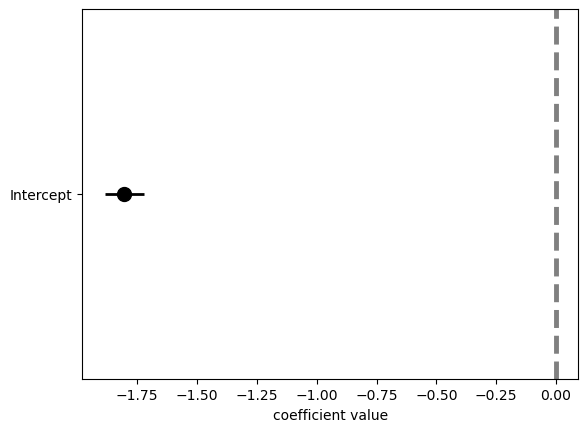

In [109]:
my_coefplot(fit_glm_intercept)

There is only 1 coefficient in this model: the intercept. It is statistically significant since the p value is < 0.05. The coefficient is negative.

Check if the variables `total_intl_calls`, `number_customer_service_calls` and `number_vmail_messages` are better predictors for churn in categorical form or continuous form before creating any other models:

First I will check the `total_intl_calls`:

In [110]:
fit_glm_intl_cat = smf.logit(formula='churn~bin_total_intl_calls',data=churn_df_new).fit()

Optimization terminated successfully.
         Current function value: 0.405778
         Iterations 6


In [111]:
fit_glm_intl_cat.params

Intercept                                                     -1.617761
bin_total_intl_calls[T.Interval(3.0, 4.0, closed='right')]    -0.254646
bin_total_intl_calls[T.Interval(4.0, 6.0, closed='right')]    -0.391492
bin_total_intl_calls[T.Interval(6.0, 20.0, closed='right')]   -0.325371
dtype: float64

In [112]:
fit_glm_intl_cont = smf.logit(formula='churn~total_intl_calls',data=churn_df_new).fit()

Optimization terminated successfully.
         Current function value: 0.405751
         Iterations 6


In [113]:
fit_glm_intl_cont.params

Intercept          -1.814103
total_intl_calls   -0.170727
dtype: float64

Now I will fit a model checking `number_vmail_messages` and its counterpart:

In [114]:
fit_glm_vmail= smf.logit(formula='churn~bin_number_vmail_messages',data=churn_df_new).fit()

Optimization terminated successfully.
         Current function value: 0.399738
         Iterations 7


In [115]:
fit_glm_vmail.params

Intercept                             -1.625181
bin_number_vmail_messages[T.medium]   -1.424341
bin_number_vmail_messages[T.high]     -0.664062
dtype: float64

In [116]:
fit_glm_vmail.pvalues

Intercept                              2.680944e-292
bin_number_vmail_messages[T.medium]     2.514790e-09
bin_number_vmail_messages[T.high]       7.537619e-08
dtype: float64

In [117]:
fit_glm_vmail_cont = smf.logit(formula='churn~number_vmail_messages',data=churn_df_new).fit()

Optimization terminated successfully.
         Current function value: 0.269451
         Iterations 7


In [118]:
fit_glm_vmail_cont.pvalues

Intercept                1.433449e-124
number_vmail_messages     1.380327e-02
dtype: float64

HOWEVER, since I REMOVED all 0's in the number_vmail_messages, the data contains a significant amount of NAs for this column, therefore, I will be using the categorical column for the models instead of the continuous.

Lastly, I will fit models with `group_number_customer_service_calls` and its numeric counterpart:

In [119]:
fit_glm_cust_cat = smf.logit(formula='churn~group_number_customer_service_calls', data=churn_df_new).fit()

Optimization terminated successfully.
         Current function value: 0.374031
         Iterations 6


In [120]:
fit_glm_cust_cat.pvalues

Intercept                                       1.248139e-95
group_number_customer_service_calls[T.1]        3.337796e-01
group_number_customer_service_calls[T.2]        4.634491e-01
group_number_customer_service_calls[T.3]        5.924841e-01
group_number_customer_service_calls[T.Other]    7.713940e-48
dtype: float64

In [121]:
fit_glm_cust_cont = smf.logit(formula='churn~number_customer_service_calls', data=churn_df_new).fit()

Optimization terminated successfully.
         Current function value: 0.393168
         Iterations 6


In [122]:
fit_glm_cust_cont.pvalues

Intercept                        0.000000e+00
number_customer_service_calls    8.308769e-32
dtype: float64

Now I wll see which models perform best on teh training set to determine which variables to keep as inputs (the categorical or the conintuous ones). I will look at the confusion matrix. Define a function that will calculate the accuracy, Sensitivity, Specificity, False positive rate, ROC curce, and the Area under the roc curve. But in order to do this I need to import specific modules

In [123]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [124]:
def fit_and_assess_logistic(mod_name, a_formula, train_data, threshold):
    a_mod = smf.logit(formula= a_formula, data=train_data).fit()

    train_copy = train_data.copy()

    train_copy['pred_probability'] = a_mod.predict( train_data)

    train_copy['pred_class'] = np.where( train_copy.pred_probability > threshold, 1, 0)

    TN, FP, FN, TP = confusion_matrix( train_copy.churn.to_numpy(), train_copy.pred_class.to_numpy()).ravel()

    Accuracy = (TN + TP) / (TN + TP + FN + FP)

    Sensitivity = (TP) / (TP + FN)

    Specificity = (TN) / (TN + FP)

    FPR = 1 - Specificity

    ROC_AUC = roc_auc_score( train_copy.churn.to_numpy(), train_copy.pred_probability.to_numpy())

    res_dict = {'model name': mod_name, 
               'model formula': a_formula,
               'num_coef': len(a_mod.params),
               'threshold': threshold,
               'Accuracy': Accuracy,
               'Sensitivity': Sensitivity,
               'Specificity': Specificity,
               'FPR': FPR,
               'ROC AUC': ROC_AUC}

    return pd.DataFrame( res_dict, index=[0] )

In [125]:
fit_and_assess_logistic(0, 'churn ~ bin_total_intl_calls', train_data=churn_df_new, threshold=0.50)

Optimization terminated successfully.
         Current function value: 0.405778
         Iterations 6


model name                 model formula  num_coef  threshold  Accuracy  \
0           0  churn ~ bin_total_intl_calls         4        0.5    0.8586   

   Sensitivity  Specificity  FPR   ROC AUC  
0          0.0          1.0  0.0  0.545211

In [126]:
fit_and_assess_logistic(1, 'churn ~ total_intl_calls', train_data=churn_df_new, threshold=0.50)

Optimization terminated successfully.
         Current function value: 0.405751
         Iterations 6


model name             model formula  num_coef  threshold  Accuracy  \
0           1  churn ~ total_intl_calls         2        0.5    0.8586   

   Sensitivity  Specificity  FPR  ROC AUC  
0          0.0          1.0  0.0  0.55329

From these performance metrics, I will use the continuous variable `total_intl_calls` instead of the categorical one, since it has a better ROC AUC

In [127]:
fit_and_assess_logistic(2, 'churn ~ bin_number_vmail_messages', train_data=churn_df_new, threshold=0.50)

Optimization terminated successfully.
         Current function value: 0.399738
         Iterations 7


model name                      model formula  num_coef  threshold  \
0           2  churn ~ bin_number_vmail_messages         3        0.5   

   Accuracy  Sensitivity  Specificity  FPR   ROC AUC  
0    0.8586          0.0          1.0  0.0  0.572875

In [128]:
fit_and_assess_logistic(3, 'churn ~ group_number_customer_service_calls', train_data=churn_df_new, threshold=0.50)

Optimization terminated successfully.
         Current function value: 0.374031
         Iterations 6


model name                                model formula  num_coef  \
0           3  churn ~ group_number_customer_service_calls         5   

   threshold  Accuracy  Sensitivity  Specificity       FPR   ROC AUC  
0        0.5    0.8592       0.2843     0.953878  0.046122  0.626999

In [129]:
fit_and_assess_logistic(4, 'churn ~ number_customer_service_calls', train_data=churn_df_new, threshold=0.50)

Optimization terminated successfully.
         Current function value: 0.393168
         Iterations 6


model name                          model formula  num_coef  threshold  \
0           4  churn ~ number_customer_service_calls         2        0.5   

   Accuracy  Sensitivity  Specificity  FPR   ROC AUC  
0    0.8586          0.0          1.0  0.0  0.615186

From these performance metrics, I will use the categorical variable `group_number_customer_service_calls` for the better accuracy and ROC AUC score. Remember, I will ONLY DO CHOOSE THESE VARIABLES OVER THE OTHER WHEN ASKED FOR ONE OR THE OTHER IN A MODEL (i.e. ALL inputs, then I would specify that I only want to use total_intl_calls instead of bin_total_intl_calls)

#### Fit a logistic model with only categorical inputs with additive features:

In [130]:
fit_glm_cat_add = smf.logit(formula = 'churn ~ area_code + international_plan  + group_number_customer_service_calls + bin_number_vmail_messages + bin_total_intl_calls',
                            data=churn_df_new).fit()

Optimization terminated successfully.
         Current function value: 0.336251
         Iterations 7


In [131]:
fit_glm_cat_add.params

Intercept                                                     -1.998976
area_code[T.area_code_415]                                    -0.002691
area_code[T.area_code_510]                                     0.004491
international_plan[T.yes]                                      1.984344
group_number_customer_service_calls[T.1]                      -0.038434
group_number_customer_service_calls[T.2]                      -0.032235
group_number_customer_service_calls[T.3]                      -0.056983
group_number_customer_service_calls[T.Other]                   2.285143
bin_number_vmail_messages[T.medium]                           -1.644619
bin_number_vmail_messages[T.high]                             -0.820650
bin_total_intl_calls[T.Interval(3.0, 4.0, closed='right')]    -0.289651
bin_total_intl_calls[T.Interval(4.0, 6.0, closed='right')]    -0.341836
bin_total_intl_calls[T.Interval(6.0, 20.0, closed='right')]   -0.374756
dtype: float64

In [132]:
fit_glm_cat_add.params.count()

13

In [133]:
fit_glm_cat_add.pvalues<0.05

Intercept                                                       True
area_code[T.area_code_415]                                     False
area_code[T.area_code_510]                                     False
international_plan[T.yes]                                       True
group_number_customer_service_calls[T.1]                       False
group_number_customer_service_calls[T.2]                       False
group_number_customer_service_calls[T.3]                       False
group_number_customer_service_calls[T.Other]                    True
bin_number_vmail_messages[T.medium]                             True
bin_number_vmail_messages[T.high]                               True
bin_total_intl_calls[T.Interval(3.0, 4.0, closed='right')]      True
bin_total_intl_calls[T.Interval(4.0, 6.0, closed='right')]      True
bin_total_intl_calls[T.Interval(6.0, 20.0, closed='right')]     True
dtype: bool

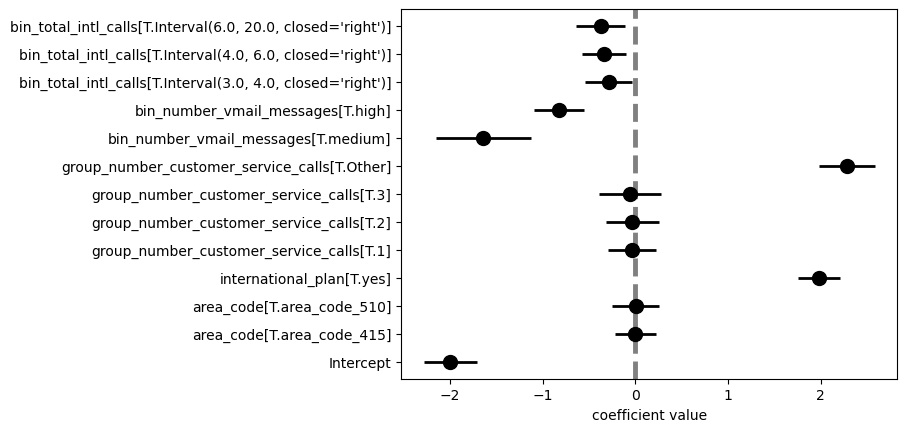

In [134]:
my_coefplot(fit_glm_cat_add)

There are 13 coefficients estimated, with 8 being statistically significant. These coefficients are the intercept (negative value), the international plan (positive value), the other group number customer service (positive value), medium number of voicemails (negative value), high voicemails (negative value), and all the values (besides the dummy variable) for total intl calls (all negative values). The highest value magnitude is the other group number of customer service calls, followed by the intercept. Remember that for categorical inputs, when we calculate the coefficient is statistically significant, we are saying that there is a statistically significant DIFFERENCE in the AVERAGE OUTPUT from the REFERENCE CATEGORY!!!!

#### Use continuous inputs with additive features:

In [135]:
fit_glm_cont_add = smf.logit(formula = 'churn ~ account_length + total_day_minutes + total_day_calls + total_eve_minutes + total_eve_calls + total_night_minutes + total_night_calls + total_intl_minutes + total_intl_calls + number_customer_service_calls',
                            data = churn_df_new).fit()

Optimization terminated successfully.
         Current function value: 0.359001
         Iterations 7


In [136]:
fit_glm_cont_add.params

Intercept                       -2.109213
account_length                   0.065542
total_day_minutes                0.674613
total_day_calls                  0.047526
total_eve_minutes                0.311611
total_eve_calls                 -0.032302
total_night_minutes              0.150187
total_night_calls               -0.029032
total_intl_minutes               0.240842
total_intl_calls                -0.192101
number_customer_service_calls    0.541103
dtype: float64

In [137]:
fit_glm_cont_add.pvalues < 0.05

Intercept                         True
account_length                   False
total_day_minutes                 True
total_day_calls                  False
total_eve_minutes                 True
total_eve_calls                  False
total_night_minutes               True
total_night_calls                False
total_intl_minutes                True
total_intl_calls                  True
number_customer_service_calls     True
dtype: bool

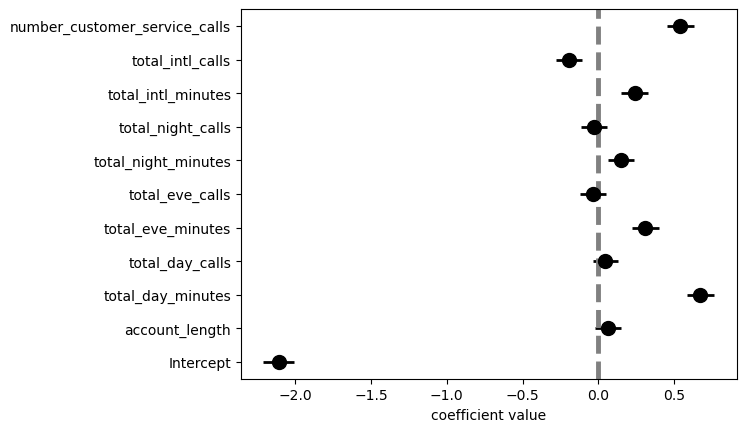

In [138]:
my_coefplot(fit_glm_cont_add)

There are a total of 11 coefficients, with 7 of those beign statistically significant (the intercept, total day minutes, total_night_minutes, total_eve_minutes, total_intl_calls, total_intlminutes, and number_customer_service_calls. The only negative significant coefficient is the intercept, which also has the highest value out of the coefficients, and total_intl_calls. The second largest value is total_day_miuntes.

#### Fit a model with ALL inputs with linear additive features:

In [139]:
fit_glm_all_add = smf.logit(formula = 'churn ~ account_length + total_day_minutes + total_day_calls + total_eve_minutes + total_eve_calls + total_night_minutes + total_night_calls + total_intl_minutes + total_intl_calls + number_customer_service_calls + state + voice_mail_plan + area_code + international_plan  + group_number_customer_service_calls + bin_number_vmail_messages + bin_total_intl_calls',
                            data = churn_df_new).fit()

         Current function value: 0.287403
         Iterations: 35


C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [140]:
fit_glm_all_add.params

Intercept                       -1.051883
state[T.AL]                      0.228094
state[T.AR]                      0.885055
state[T.AZ]                      0.176286
state[T.CA]                      1.541206
                                   ...   
total_night_minutes              0.238619
total_night_calls               -0.031943
total_intl_minutes               0.264690
total_intl_calls                -0.336783
number_customer_service_calls    1.458731
Length: 74, dtype: float64

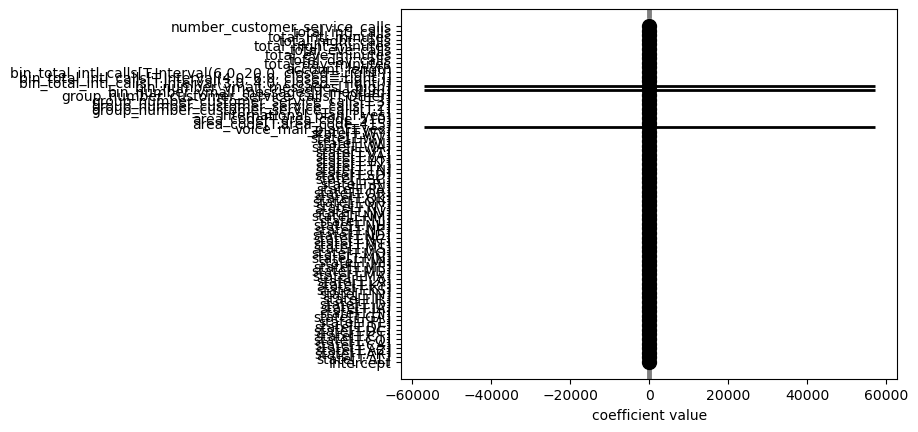

In [141]:
my_coefplot(fit_glm_all_add)

When I use all the inputs there are way too many coefficients to gather any insight inot the model. This is because the variable `state` has 49 different values. I will exclude `state` and rerun the model

In [142]:
fit_glm_all_add = smf.logit(formula = 'churn ~ account_length + total_day_minutes + total_day_calls + total_eve_minutes + total_eve_calls + total_night_minutes + total_night_calls + total_intl_minutes + total_intl_calls + number_customer_service_calls + voice_mail_plan + area_code + international_plan + group_number_customer_service_calls + bin_number_vmail_messages + bin_total_intl_calls',
                            data = churn_df_new).fit()

         Current function value: 0.297853
         Iterations: 35


C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [144]:
fit_glm_all_add.params

Intercept                                                      -0.519076
voice_mail_plan[T.yes]                                        -18.484067
area_code[T.area_code_415]                                     -0.054545
area_code[T.area_code_510]                                      0.028960
international_plan[T.yes]                                       2.174873
group_number_customer_service_calls[T.1]                       -1.658370
group_number_customer_service_calls[T.2]                       -2.765321
group_number_customer_service_calls[T.3]                       -3.791723
group_number_customer_service_calls[T.Other]                   -2.135739
bin_number_vmail_messages[T.medium]                            16.657449
bin_number_vmail_messages[T.high]                              17.486436
bin_total_intl_calls[T.Interval(3.0, 4.0, closed='right')]      0.002546
bin_total_intl_calls[T.Interval(4.0, 6.0, closed='right')]      0.150026
bin_total_intl_calls[T.Interval(6.0, 20.0, closed='

In [145]:
fit_glm_all_add.pvalues < 0.05

Intercept                                                      False
voice_mail_plan[T.yes]                                         False
area_code[T.area_code_415]                                     False
area_code[T.area_code_510]                                     False
international_plan[T.yes]                                       True
group_number_customer_service_calls[T.1]                        True
group_number_customer_service_calls[T.2]                        True
group_number_customer_service_calls[T.3]                        True
group_number_customer_service_calls[T.Other]                   False
bin_number_vmail_messages[T.medium]                            False
bin_number_vmail_messages[T.high]                              False
bin_total_intl_calls[T.Interval(3.0, 4.0, closed='right')]     False
bin_total_intl_calls[T.Interval(4.0, 6.0, closed='right')]     False
bin_total_intl_calls[T.Interval(6.0, 20.0, closed='right')]    False
account_length                    

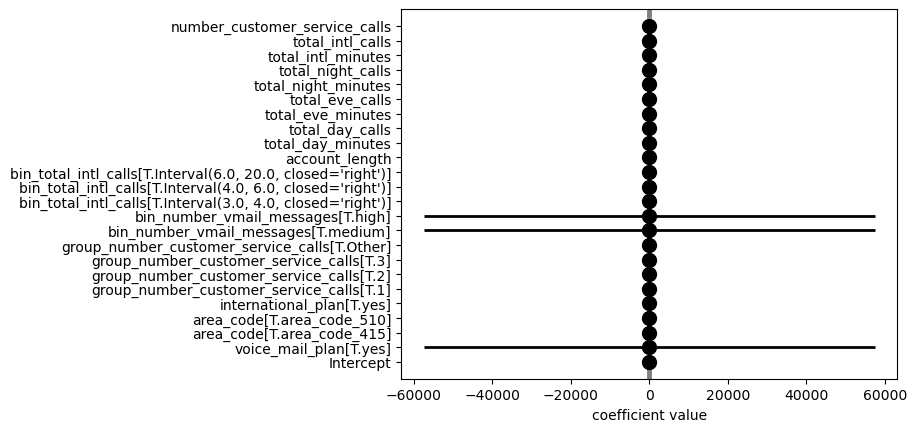

In [146]:
my_coefplot(fit_glm_all_add)

This model does not tell anything and the reason is because of the voicemail plan input and the bin number of voicemails, so I will exclude the binned voicemails.

In [149]:
fit_glm_all_add = smf.logit(formula = 'churn ~ account_length + total_day_minutes + total_day_calls + total_eve_minutes + total_eve_calls + total_night_minutes + total_night_calls + total_intl_minutes + total_intl_calls + voice_mail_plan + area_code + international_plan + group_number_customer_service_calls',
                            data = churn_df_new).fit()

Optimization terminated successfully.
         Current function value: 0.300965
         Iterations 7


In [150]:
fit_glm_all_add.params

Intercept                                      -2.541156
voice_mail_plan[T.yes]                         -1.178395
area_code[T.area_code_415]                     -0.046695
area_code[T.area_code_510]                      0.033143
international_plan[T.yes]                       2.159158
group_number_customer_service_calls[T.1]        0.015130
group_number_customer_service_calls[T.2]        0.095331
group_number_customer_service_calls[T.3]       -0.015274
group_number_customer_service_calls[T.Other]    2.688171
account_length                                  0.065269
total_day_minutes                               0.773032
total_day_calls                                 0.037038
total_eve_minutes                               0.376134
total_eve_calls                                -0.044536
total_night_minutes                             0.232057
total_night_calls                              -0.020620
total_intl_minutes                              0.255874
total_intl_calls               

In [151]:
fit_glm_all_add.pvalues < 0.05

Intercept                                        True
voice_mail_plan[T.yes]                           True
area_code[T.area_code_415]                      False
area_code[T.area_code_510]                      False
international_plan[T.yes]                        True
group_number_customer_service_calls[T.1]        False
group_number_customer_service_calls[T.2]        False
group_number_customer_service_calls[T.3]        False
group_number_customer_service_calls[T.Other]     True
account_length                                  False
total_day_minutes                                True
total_day_calls                                 False
total_eve_minutes                                True
total_eve_calls                                 False
total_night_minutes                              True
total_night_calls                               False
total_intl_minutes                               True
total_intl_calls                                 True
dtype: bool

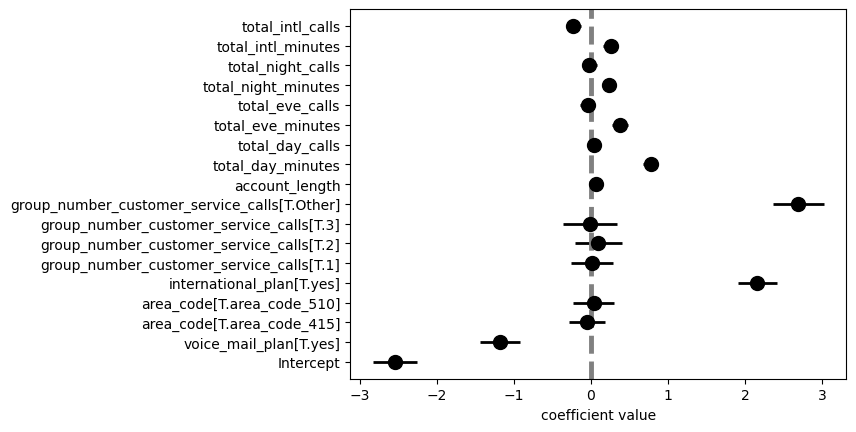

In [148]:
my_coefplot(fit_glm_all_add)

There are 9 statistically significant coefficeints, compared to 18 coefficeints total. The statistically significant coefficients are: the intercept (the second largest value in magnitude and negative value), voicemail plan (negative value), international plan (positive value), group number customer service calls other (largest magnitude positive value), total day minutes (positive value), total eve minutes (positive value), total night minutes (positive value), total intl minutes (positive value), and total intl calls (negative value).

#### Fit a logistic model with continuous inputs with linear main effect and pair wise interactions:

In [152]:
fit_glm_cont_both = smf.logit(formula = 'churn ~ account_length * total_day_minutes + total_day_calls * total_eve_minutes + total_eve_calls * total_night_minutes + total_night_calls * total_intl_minutes + total_intl_calls * number_customer_service_calls', 
                              data=churn_df_new).fit()

Optimization terminated successfully.
         Current function value: 0.357768
         Iterations 7


In [153]:
fit_glm_cont_both.params

Intercept                                        -2.113252
account_length                                    0.050205
total_day_minutes                                 0.671002
account_length:total_day_minutes                  0.037649
total_day_calls                                   0.029047
total_eve_minutes                                 0.307087
total_day_calls:total_eve_minutes                 0.084344
total_eve_calls                                  -0.034967
total_night_minutes                               0.153006
total_eve_calls:total_night_minutes               0.025646
total_night_calls                                -0.041534
total_intl_minutes                                0.239929
total_night_calls:total_intl_minutes              0.108085
total_intl_calls                                 -0.175640
number_customer_service_calls                     0.538454
total_intl_calls:number_customer_service_calls   -0.054679
dtype: float64

In [154]:
fit_glm_cont_both.pvalues <0.05

Intercept                                          True
account_length                                    False
total_day_minutes                                  True
account_length:total_day_minutes                  False
total_day_calls                                   False
total_eve_minutes                                  True
total_day_calls:total_eve_minutes                 False
total_eve_calls                                   False
total_night_minutes                                True
total_eve_calls:total_night_minutes               False
total_night_calls                                 False
total_intl_minutes                                 True
total_night_calls:total_intl_minutes               True
total_intl_calls                                   True
number_customer_service_calls                      True
total_intl_calls:number_customer_service_calls    False
dtype: bool

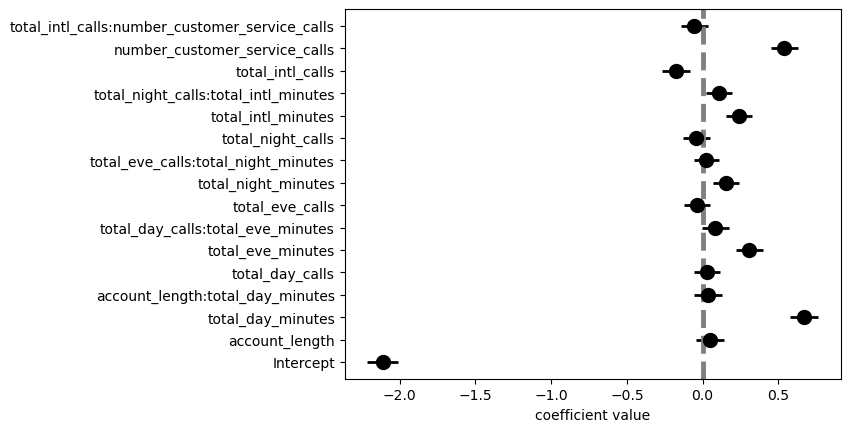

In [155]:
my_coefplot(fit_glm_cont_both)

There are 16 coefficients, with 8 being siginificant. The significant coefficients are: the intercept (which is a negative value and has the highest value magnitude), total day minutes (positive value), total eve minutes (positive value), total night minutes (positive value), total intl minutes (positive value), total night calls interacted with total intl minutes (positive value), total intl calls (positive value), and number of customer servicce calls (positive value and second largest value).

#### Fit model that interacts categorical inputs with continuous inputs and include the main effects (remember that I will now be selecting the certain categorical/continuous variables that I modeled earlier, while removing others):

In [156]:
fit_glm_all_both = smf.logit(formula='churn ~ (voice_mail_plan + area_code + international_plan + group_number_customer_service_calls) * (account_length + total_day_minutes + total_day_calls + total_eve_minutes + total_eve_calls + total_night_minutes + total_night_calls + total_intl_minutes + total_intl_calls)', 
                             data=churn_df_new).fit()

Optimization terminated successfully.
         Current function value: 0.215918
         Iterations 8


In [157]:
fit_glm_all_both.params.count()

90

In [158]:
fit_glm_all_both.pvalues.where(fit_glm_all_both.pvalues < 0.05)

Intercept                                                        2.826568e-55
voice_mail_plan[T.yes]                                           2.138249e-03
area_code[T.area_code_415]                                                NaN
area_code[T.area_code_510]                                                NaN
international_plan[T.yes]                                        3.330844e-55
                                                                     ...     
international_plan[T.yes]:total_intl_calls                       1.566981e-15
group_number_customer_service_calls[T.1]:total_intl_calls                 NaN
group_number_customer_service_calls[T.2]:total_intl_calls                 NaN
group_number_customer_service_calls[T.3]:total_intl_calls        4.994501e-02
group_number_customer_service_calls[T.Other]:total_intl_calls             NaN
Length: 90, dtype: float64

In [160]:
fit_glm_all_both.pvalues.sort_values()

group_number_customer_service_calls[T.Other]                      1.367916e-55
Intercept                                                         2.826568e-55
international_plan[T.yes]                                         3.330844e-55
group_number_customer_service_calls[T.Other]:total_day_minutes    9.604587e-45
total_day_minutes                                                 7.449968e-27
                                                                      ...     
group_number_customer_service_calls[T.3]:total_day_calls          8.766166e-01
group_number_customer_service_calls[T.3]:account_length           8.847327e-01
group_number_customer_service_calls[T.1]:account_length           9.050788e-01
group_number_customer_service_calls[T.1]:total_day_calls          9.147455e-01
group_number_customer_service_calls[T.3]                          9.285378e-01
Length: 90, dtype: float64

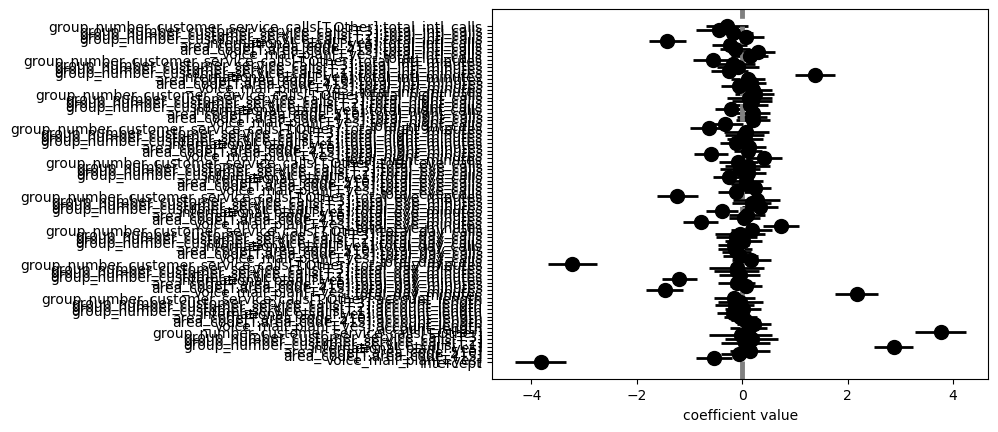

In [161]:
my_coefplot(fit_glm_all_both)

There are 90 coefficients that were estimated, 20 of which are statistically significant. 

#### Model of my choice (Number 1):

One model I will apply a sin function to `total_day_minutes` because it seems to have a cyclical relationship with churn (as shown in the KDE plot in EDA section). I will also add a second degree polynomial for `total_day_minutes` and the sin of `total_day_minutes`. I will iteract these with some of the categorical inputs, and also interact categorical variables with `total_intl_minutes`. Then add continuous inputs to the model (with no interactions).

In [173]:
fit_glm_model_1 = smf.logit(formula='churn ~ (group_number_customer_service_calls + bin_number_vmail_messages + international_plan) * (np.sin(total_day_minutes) + np.power(np.sin(total_day_minutes),2)  + np.power(total_day_minutes, 2) + np.power(total_day_minutes,3) + total_intl_minutes) + total_day_minutes + account_length + total_night_minutes + total_eve_minutes + total_intl_calls + total_day_calls + total_night_calls', data=churn_df_new).fit()

Optimization terminated successfully.
         Current function value: 0.216555
         Iterations 11


In [178]:
fit_glm_model_1.params.sort_values()

Intercept                                                                             -3.930771
group_number_customer_service_calls[T.Other]:np.sin(total_day_minutes)                -3.745240
bin_number_vmail_messages[T.high]:np.power(np.sin(total_day_minutes), 2)              -1.617625
bin_number_vmail_messages[T.medium]:np.sin(total_day_minutes)                         -1.209058
bin_number_vmail_messages[T.medium]                                                   -1.111387
bin_number_vmail_messages[T.medium]:np.power(total_day_minutes, 2)                    -1.013763
total_day_minutes                                                                     -0.978119
international_plan[T.yes]:np.power(np.sin(total_day_minutes), 2)                      -0.769851
bin_number_vmail_messages[T.medium]:np.power(np.sin(total_day_minutes), 2)            -0.720931
international_plan[T.yes]:np.sin(total_day_minutes)                                   -0.615574
group_number_customer_service_calls[T.Ot

In [175]:
fit_glm_model_1.pvalues < 0.05

Intercept                                                                               True
group_number_customer_service_calls[T.1]                                               False
group_number_customer_service_calls[T.2]                                               False
group_number_customer_service_calls[T.3]                                               False
group_number_customer_service_calls[T.Other]                                            True
bin_number_vmail_messages[T.medium]                                                    False
bin_number_vmail_messages[T.high]                                                      False
international_plan[T.yes]                                                               True
np.sin(total_day_minutes)                                                              False
group_number_customer_service_calls[T.1]:np.sin(total_day_minutes)                     False
group_number_customer_service_calls[T.2]:np.sin(total_day_minutes)    

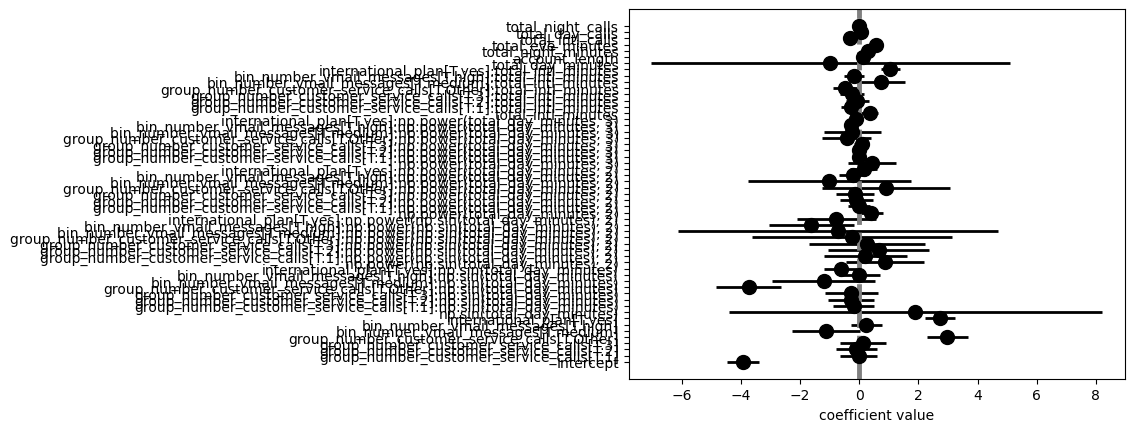

In [176]:
my_coefplot(fit_glm_model_1)

There are a total of 55 coefficients estimated, 14 of which are statistically significant. The intercept (negative value and highest value), the other group number of customer service calls interacted with the sin of total day minutes (negative and second largest value), high voice mail messages interacted with sin of total day min raised to 2nd power (negative value), medium voice mail messages interacted with sin of day min (negative value), other customer service calls (positive value), internation plan (positive value), internation plan interacted with sin of day min (negative value), high voicemail messages interacted with day min raised to 3rd power (negative value), total intl minutes (positive value), other group customer service calls interacted with total intl min (negative value), international plan interacted with total intl min (positive value), account length (positive),
total night min (positive), total eve min (positive), total intl calls (negative), and total day calls (positive).

So, it seems like the sin of total day minutes, the sin raised to the second power, and total day minutes raised to the second power DOES change across certian catgories since an interaction with a categorical variable is statistically significant but the other interaction is not for the same categorical variable.

#### Model of my choice (Number 2):

For my last model I will apply another sin function and polynomial function, but this time to `number_customer_service_calls` since it looks like a cyclical relationship to churn (as shown below):

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


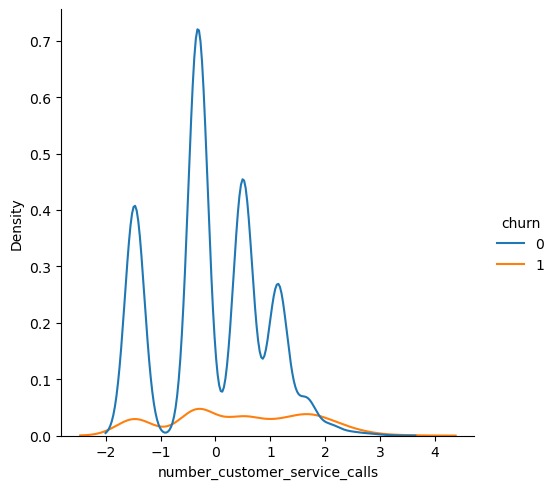

In [168]:
sns.displot(data=churn_df_new, x='number_customer_service_calls', hue='churn', kind='kde')
plt.show()

In [169]:
fit_glm_model_2 = smf.logit(formula='churn ~ (np.sin(number_customer_service_calls) + np.power(np.sin(number_customer_service_calls), 2)) * (bin_number_vmail_messages + area_code + international_plan)', data=churn_df_new).fit()

Optimization terminated successfully.
         Current function value: 0.361773
         Iterations 8


In [170]:
fit_glm_model_2.params

Intercept                                                                                -2.304106
bin_number_vmail_messages[T.medium]                                                      -2.227948
bin_number_vmail_messages[T.high]                                                        -0.800682
area_code[T.area_code_415]                                                                0.088521
area_code[T.area_code_510]                                                               -0.047263
international_plan[T.yes]                                                                 2.049970
np.sin(number_customer_service_calls)                                                     0.438763
np.sin(number_customer_service_calls):bin_number_vmail_messages[T.medium]                 0.138481
np.sin(number_customer_service_calls):bin_number_vmail_messages[T.high]                   0.472664
np.sin(number_customer_service_calls):area_code[T.area_code_415]                          0.097549
np.sin(num

In [171]:
fit_glm_model_2.pvalues < 0.05

Intercept                                                                                  True
bin_number_vmail_messages[T.medium]                                                        True
bin_number_vmail_messages[T.high]                                                          True
area_code[T.area_code_415]                                                                False
area_code[T.area_code_510]                                                                False
international_plan[T.yes]                                                                  True
np.sin(number_customer_service_calls)                                                      True
np.sin(number_customer_service_calls):bin_number_vmail_messages[T.medium]                 False
np.sin(number_customer_service_calls):bin_number_vmail_messages[T.high]                    True
np.sin(number_customer_service_calls):area_code[T.area_code_415]                          False
np.sin(number_customer_service_calls):ar

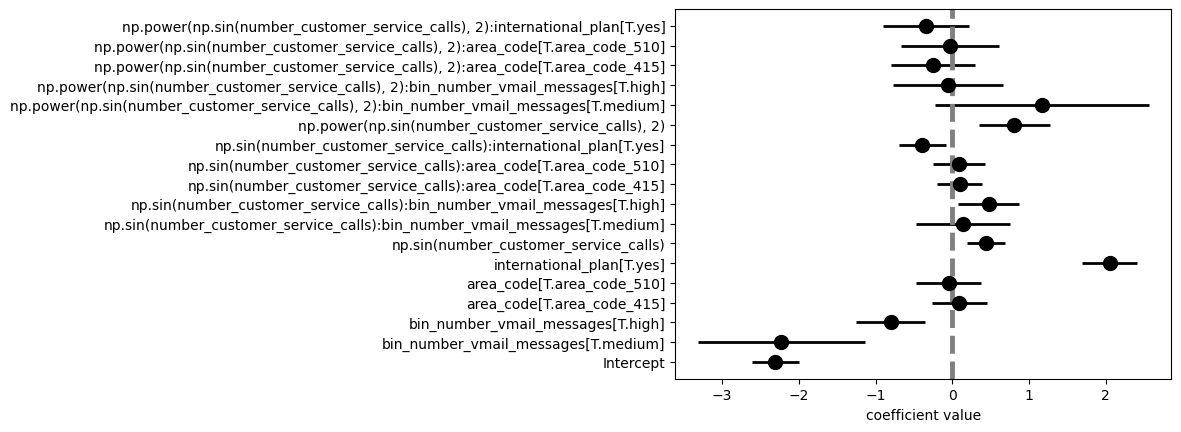

In [172]:
my_coefplot(fit_glm_model_2)

There are 18 coefficients estimates, with 8 of those being significant. These significant coefficients are: the intercept (highest value and is negative), the sin of number customer service calls (positive value), the medium and high bins for number of voicemails (both negative), international plan (second highest value and is positive), the 2nd degree polynomial of the sin of number of custoemr service calls (positive value), the sin of customer service calls (positive value), the sin of customer srevice calls interacted with high voicemails (positive), sin opf customer service calls interacted with international plan (negative)

In other words, the sin of customer service calls changes based on the the categories (i.e. number of voicemails).

### Confusion Matrix:

I will create a confuision matrix that will show the Accuracy, Specificity, Sensitivity, False positive rate, the ROC, and the ROC AUC on the TRAINING SET. First I will put all the formulas I used to fit the models in a list

In [179]:
formula_list = ['churn ~ 1',
                'churn ~ area_code + international_plan  + group_number_customer_service_calls + bin_number_vmail_messages + bin_total_intl_calls',
                'churn ~ account_length + total_day_minutes + total_day_calls + total_eve_minutes + total_eve_calls + total_night_minutes + total_night_calls + total_intl_minutes + total_intl_calls + number_customer_service_calls',
                'churn ~ account_length + total_day_minutes + total_day_calls + total_eve_minutes + total_eve_calls + total_night_minutes + total_night_calls + total_intl_minutes + total_intl_calls + voice_mail_plan + area_code + international_plan + group_number_customer_service_calls',
                'churn ~ account_length *  total_day_minutes + total_day_calls * total_eve_minutes + total_eve_calls * total_night_minutes + total_night_calls * total_intl_minutes + total_intl_calls * number_customer_service_calls',
                'churn ~ (voice_mail_plan + area_code + international_plan + group_number_customer_service_calls) * (account_length + total_day_minutes + total_day_calls + total_eve_minutes + total_eve_calls + total_night_minutes + total_night_calls + total_intl_minutes + total_intl_calls)',
                'churn ~ (group_number_customer_service_calls + bin_number_vmail_messages + international_plan) * (np.sin(total_day_minutes) + np.power(np.sin(total_day_minutes),2)  + np.power(total_day_minutes, 2) + np.power(total_day_minutes,3) + total_intl_minutes) + total_day_minutes + account_length + total_night_minutes + total_eve_minutes + total_intl_calls + total_day_calls + total_night_calls',
                'churn ~ (np.sin(number_customer_service_calls) + np.power(number_customer_service_calls,2)) * (bin_number_vmail_messages + area_code + international_plan)'
                
]

Assume a threshold of 0.5 and fit all the models using the formulas in the list

In [180]:
results_list = [ ]

for m in range(len(formula_list)):
    results_list.append(fit_and_assess_logistic(m, formula_list[m], train_data=churn_df_new, threshold=0.50))

Optimization terminated successfully.
         Current function value: 0.407497
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.336251
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.359001
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300965
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.357768
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215918
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.216555
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.343862
         Iterations 8


In [181]:
results_df = pd.concat(results_list, ignore_index=True)

In [182]:
results_df

model name                                      model formula  num_coef  \
0           0                                          churn ~ 1         1   
1           1  churn ~ area_code + international_plan  + grou...        13   
2           2  churn ~ account_length + total_day_minutes + t...        11   
3           3  churn ~ account_length + total_day_minutes + t...        18   
4           4  churn ~ account_length *  total_day_minutes + ...        16   
5           5  churn ~ (voice_mail_plan + area_code + interna...        90   
6           6  churn ~ (group_number_customer_service_calls +...        55   
7           7  churn ~ (np.sin(number_customer_service_calls)...        18   

   threshold  Accuracy  Sensitivity  Specificity       FPR   ROC AUC  
0        0.5    0.8586     0.000000     1.000000  0.000000  0.500000  
1        0.5    0.8654     0.151344     0.982996  0.017004  0.763864  
2        0.5    0.8634     0.072136     0.993711  0.006289  0.739571  
3        0.5    0.8488     0.189533     0.957372  0.042628  0.864807  
4        0.5    0.8630     0.072136     0.993245  0.006755  0.741462  
5        0.5    0.9336     0.646393     0.980899  0.019101  0.913121  
6        0.5    0.9200     0.582744     0.975542  0.024458  0.913170  
7        0.5    0.8598     0.157001     0.975542  0.024458  0.753754

Sort by accuracy:

In [183]:
results_df.sort_values(by = ['Accuracy'], ascending=False)

model name                                      model formula  num_coef  \
5           5  churn ~ (voice_mail_plan + area_code + interna...        90   
6           6  churn ~ (group_number_customer_service_calls +...        55   
1           1  churn ~ area_code + international_plan  + grou...        13   
2           2  churn ~ account_length + total_day_minutes + t...        11   
4           4  churn ~ account_length *  total_day_minutes + ...        16   
7           7  churn ~ (np.sin(number_customer_service_calls)...        18   
0           0                                          churn ~ 1         1   
3           3  churn ~ account_length + total_day_minutes + t...        18   

   threshold  Accuracy  Sensitivity  Specificity       FPR   ROC AUC  
5        0.5    0.9336     0.646393     0.980899  0.019101  0.913121  
6        0.5    0.9200     0.582744     0.975542  0.024458  0.913170  
1        0.5    0.8654     0.151344     0.982996  0.017004  0.763864  
2        0.5    0.8634     0.072136     0.993711  0.006289  0.739571  
4        0.5    0.8630     0.072136     0.993245  0.006755  0.741462  
7        0.5    0.8598     0.157001     0.975542  0.024458  0.753754  
0        0.5    0.8586     0.000000     1.000000  0.000000  0.500000  
3        0.5    0.8488     0.189533     0.957372  0.042628  0.864807

Sort by ROC AUC:

In [184]:
results_df.sort_values(by = ['ROC AUC'], ascending=False)

model name                                      model formula  num_coef  \
6           6  churn ~ (group_number_customer_service_calls +...        55   
5           5  churn ~ (voice_mail_plan + area_code + interna...        90   
3           3  churn ~ account_length + total_day_minutes + t...        18   
1           1  churn ~ area_code + international_plan  + grou...        13   
7           7  churn ~ (np.sin(number_customer_service_calls)...        18   
4           4  churn ~ account_length *  total_day_minutes + ...        16   
2           2  churn ~ account_length + total_day_minutes + t...        11   
0           0                                          churn ~ 1         1   

   threshold  Accuracy  Sensitivity  Specificity       FPR   ROC AUC  
6        0.5    0.9200     0.582744     0.975542  0.024458  0.913170  
5        0.5    0.9336     0.646393     0.980899  0.019101  0.913121  
3        0.5    0.8488     0.189533     0.957372  0.042628  0.864807  
1        0.5    0.8654     0.151344     0.982996  0.017004  0.763864  
7        0.5    0.8598     0.157001     0.975542  0.024458  0.753754  
4        0.5    0.8630     0.072136     0.993245  0.006755  0.741462  
2        0.5    0.8634     0.072136     0.993711  0.006289  0.739571  
0        0.5    0.8586     0.000000     1.000000  0.000000  0.500000

The best model ON THE TRAINING SET for accuracy is model 5 (categorical interacting with continuous and linear additive). It performs a lot better than the intercept only model and has 90 coefficients. This may be because of what we discussed in class where it is very good at memorizing the data instead of actually predicitng it with the large amount of coefficients that are present. The best model for ROC AUC on the TRAINING SET is model 6, which has 55 coefficients. 

### Models: Predictions:

#### Predict using Model name 6:

For the first model I will use the 55 coefficients, with the most important inputs being (1. the number customer serivce call group 2. international plan 3. sin of total day min ). I will now construct the input grid for this model. All the other inputs I will create a constant for in the input grid.

In [186]:
input_grid_mod_1 = pd.DataFrame( [(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11) for x1 in np.linspace(churn_df_new.total_day_minutes.min(), churn_df_new.total_day_minutes.max(), num=101)
                                                 for x2 in churn_df_new.group_number_customer_service_calls.unique()
                                                 for x3 in churn_df_new.international_plan.unique()
                                                 for x4 in [churn_df_new.bin_number_vmail_messages.mode()[0]]
                                                 for x5 in [churn_df_new.total_intl_minutes.mean()]
                                                 for x6 in [churn_df_new.account_length.mean()]
                                                 for x7 in [churn_df_new.total_night_minutes.mean()]
                                                 for x8 in [churn_df_new.total_eve_minutes.mean()]
                                                 for x9 in [churn_df_new.total_intl_calls.mean()]
                                                 for x10 in [churn_df_new.total_day_calls.mean()]
                                                 for x11 in [churn_df_new.total_night_calls.mean()]],
                          columns = ['total_day_minutes', 'group_number_customer_service_calls', 'international_plan', 'bin_number_vmail_messages',
                                    'total_intl_minutes', 'account_length', 'total_night_minutes', 'total_eve_minutes',
                                    'total_intl_calls', 'total_day_calls', 'total_night_calls'])

In [187]:
input_grid_mod_1.nunique()

total_day_minutes                      101
group_number_customer_service_calls      5
international_plan                       2
bin_number_vmail_messages                1
total_intl_minutes                       1
account_length                           1
total_night_minutes                      1
total_eve_minutes                        1
total_intl_calls                         1
total_day_calls                          1
total_night_calls                        1
dtype: int64

In [188]:
input_grid_mod_1.shape

(1010, 11)

The number of unique values and shape matches for the project instructions.

Create a copy for visualization purposes:

In [189]:
df_viz_mod_1 = input_grid_mod_1.copy()

add a column that predicts the probability a customer churned using model 1 and the input grid:

In [190]:
df_viz_mod_1['pred_probability_model_1'] = fit_glm_model_1.predict(input_grid_mod_1)

In [191]:
df_viz_mod_1

total_day_minutes group_number_customer_service_calls  \
0             -3.345541                                   1   
1             -3.345541                                   1   
2             -3.345541                                   0   
3             -3.345541                                   0   
4             -3.345541                                   2   
...                 ...                                 ...   
1005           3.177088                                   2   
1006           3.177088                                   3   
1007           3.177088                                   3   
1008           3.177088                               Other   
1009           3.177088                               Other   

     international_plan bin_number_vmail_messages  total_intl_minutes  \
0                    no                       low        6.792789e-16   
1                   yes                       low        6.792789e-16   
2                    no                       low        6.792789e-16   
3                   yes                       low        6.792789e-16   
4                    no                       low        6.792789e-16   
...                 ...                       ...                 ...   
1005                yes                       low        6.792789e-16   
1006                 no                       low        6.792789e-16   
1007                yes                       low        6.792789e-16   
1008                 no                       low        6.792789e-16   
1009                yes                       low        6.792789e-16   

      account_length  total_night_minutes  total_eve_minutes  \
0      -3.055334e-17        -3.566925e-16      -5.968559e-17   
1      -3.055334e-17        -3.566925e-16      -5.968559e-17   
2      -3.055334e-17        -3.566925e-16      -5.968559e-17   
3      -3.055334e-17        -3.566925e-16      -5.968559e-17   
4      -3.055334e-17        -3.566925e-16      -5.968559e-17   
...              ...                  ...                ...   
1005   -3.055334e-17        -3.566925e-16      -5.968559e-17   
1006   -3.055334e-17        -3.566925e-16      -5.968559e-17   
1007   -3.055334e-17        -3.566925e-16      -5.968559e-17   
1008   -3.055334e-17        -3.566925e-16      -5.968559e-17   
1009   -3.055334e-17        -3.566925e-16      -5.968559e-17   

      total_intl_calls  total_day_calls  total_night_calls  \
0         1.331557e-15     2.245315e-16      -1.769251e-16   
1         1.331557e-15     2.245315e-16      -1.769251e-16   
2         1.331557e-15     2.245315e-16      -1.769251e-16   
3         1.331557e-15     2.245315e-16      -1.769251e-16   
4         1.331557e-15     2.245315e-16      -1.769251e-16   
...                ...              ...                ...   
1005      1.331557e-15     2.245315e-16      -1.769251e-16   
1006      1.331557e-15     2.245315e-16      -1.769251e-16   
1007      1.331557e-15     2.245315e-16      -1.769251e-16   
1008      1.331557e-15     2.245315e-16      -1.769251e-16   
1009      1.331557e-15     2.245315e-16      -1.769251e-16   

      pred_probability_model_1  
0                     0.000010  
1                     0.060347  
2                     0.000007  
3                     0.044737  
4                     0.000002  
...                        ...  
1005                  0.999944  
1006                  0.999992  
1007                  0.999995  
1008                  0.999886  
1009                  0.999923  

[1010 rows x 12 columns]

Visualize the EVENT PROBABILITY with respect to the three most important feautres:

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


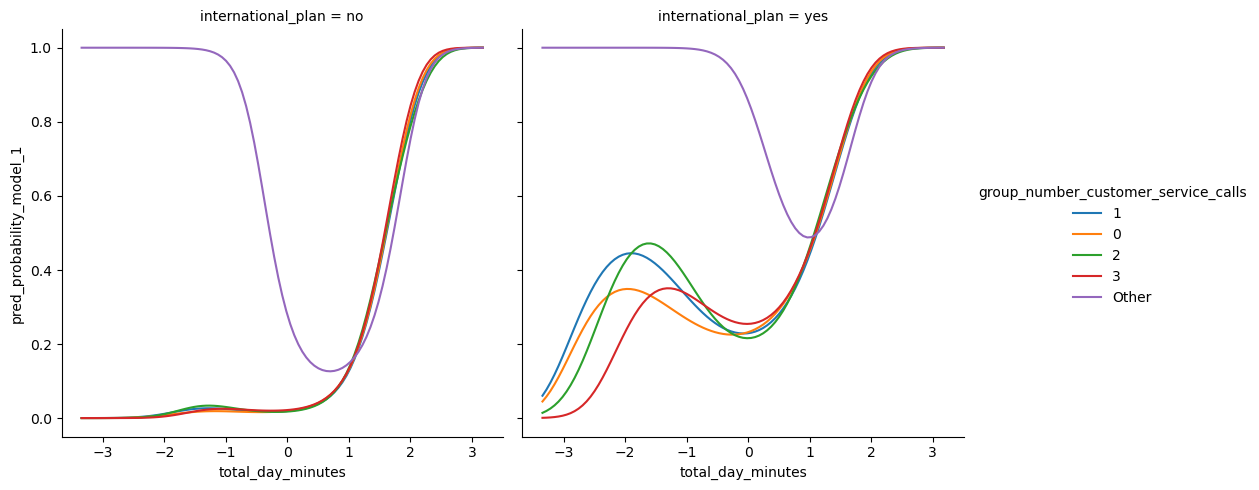

In [192]:
sns.relplot(data = df_viz_mod_1, x='total_day_minutes', y='pred_probability_model_1', hue='group_number_customer_service_calls', col='international_plan',
           kind='line', estimator=None, units='group_number_customer_service_calls')

plt.show()

The trends associated with this model is interesting. When there is no international plan, the relationship between total day minutes and the predicted probabiliy is positive (meaning that as total day minutes increases, the probability that they churned increases) for all customer service call groups EXCEPT OTHER!!! When it is other, the probability is close to 1 for all total day values, except for values near the center. If they have an international plan, the relationship does not really change between if they didn't have an interantional plan. Really, the only difference is the variation between the groups.

#### Move onto the second model, which is the one with ALL inputs with linear additive features (model name 5):

The three most important inputs for this model are the same as in the previous model (group_customer_service_calls, international_plan, and total_day_minutes). However, this model uses more inputs, so I need to update the input grid to add these variables in there.

In [193]:
input_grid_mod_2 = pd.DataFrame( [(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14) for x1 in np.linspace(churn_df_new.total_day_minutes.min(), churn_df_new.total_day_minutes.max(), num=101)
                                                 for x2 in churn_df_new.group_number_customer_service_calls.unique()
                                                 for x3 in churn_df_new.international_plan.unique()
                                                 for x4 in [churn_df_new.bin_number_vmail_messages.mode()[0]]
                                                 for x5 in [churn_df_new.total_intl_minutes.mean()]
                                                 for x6 in [churn_df_new.account_length.mean()]
                                                 for x7 in [churn_df_new.total_night_minutes.mean()]
                                                 for x8 in [churn_df_new.total_eve_minutes.mean()]
                                                 for x9 in [churn_df_new.total_intl_calls.mean()]
                                                 for x10 in [churn_df_new.total_day_calls.mean()]
                                                 for x11 in [churn_df_new.total_night_calls.mean()]
                                                 for x12 in [churn_df_new.voice_mail_plan.mode()[0]]
                                                 for x13 in [churn_df_new.area_code.mode()[0]]
                                                 for x14 in [churn_df_new.total_eve_calls.mean()]],
                          columns = ['total_day_minutes', 'group_number_customer_service_calls', 'international_plan', 'bin_number_vmail_messages',
                                    'total_intl_minutes', 'account_length', 'total_night_minutes', 'total_eve_minutes',
                                    'total_intl_calls', 'total_day_calls', 'total_night_calls', 'voice_mail_plan', 'area_code', 'total_eve_calls'])

In [194]:
input_grid_mod_2.nunique()

total_day_minutes                      101
group_number_customer_service_calls      5
international_plan                       2
bin_number_vmail_messages                1
total_intl_minutes                       1
account_length                           1
total_night_minutes                      1
total_eve_minutes                        1
total_intl_calls                         1
total_day_calls                          1
total_night_calls                        1
voice_mail_plan                          1
area_code                                1
total_eve_calls                          1
dtype: int64

In [195]:
input_grid_mod_2.shape

(1010, 14)

Shape and number of unique values match the project instructions

In [196]:
df_viz_mod_2 = input_grid_mod_2.copy()

Add a column that calculates the event probability using the second model and the second input grid:

In [197]:
df_viz_mod_2['pred_probability_model_2'] = fit_glm_all_add.predict(input_grid_mod_2)

In [198]:
df_viz_mod_2

total_day_minutes group_number_customer_service_calls  \
0             -3.345541                                   1   
1             -3.345541                                   1   
2             -3.345541                                   0   
3             -3.345541                                   0   
4             -3.345541                                   2   
...                 ...                                 ...   
1005           3.177088                                   2   
1006           3.177088                                   3   
1007           3.177088                                   3   
1008           3.177088                               Other   
1009           3.177088                               Other   

     international_plan bin_number_vmail_messages  total_intl_minutes  \
0                    no                       low        6.792789e-16   
1                   yes                       low        6.792789e-16   
2                    no                       low        6.792789e-16   
3                   yes                       low        6.792789e-16   
4                    no                       low        6.792789e-16   
...                 ...                       ...                 ...   
1005                yes                       low        6.792789e-16   
1006                 no                       low        6.792789e-16   
1007                yes                       low        6.792789e-16   
1008                 no                       low        6.792789e-16   
1009                yes                       low        6.792789e-16   

      account_length  total_night_minutes  total_eve_minutes  \
0      -3.055334e-17        -3.566925e-16      -5.968559e-17   
1      -3.055334e-17        -3.566925e-16      -5.968559e-17   
2      -3.055334e-17        -3.566925e-16      -5.968559e-17   
3      -3.055334e-17        -3.566925e-16      -5.968559e-17   
4      -3.055334e-17        -3.566925e-16      -5.968559e-17   
...              ...                  ...                ...   
1005   -3.055334e-17        -3.566925e-16      -5.968559e-17   
1006   -3.055334e-17        -3.566925e-16      -5.968559e-17   
1007   -3.055334e-17        -3.566925e-16      -5.968559e-17   
1008   -3.055334e-17        -3.566925e-16      -5.968559e-17   
1009   -3.055334e-17        -3.566925e-16      -5.968559e-17   

      total_intl_calls  total_day_calls  total_night_calls voice_mail_plan  \
0         1.331557e-15     2.245315e-16      -1.769251e-16              no   
1         1.331557e-15     2.245315e-16      -1.769251e-16              no   
2         1.331557e-15     2.245315e-16      -1.769251e-16              no   
3         1.331557e-15     2.245315e-16      -1.769251e-16              no   
4         1.331557e-15     2.245315e-16      -1.769251e-16              no   
...                ...              ...                ...             ...   
1005      1.331557e-15     2.245315e-16      -1.769251e-16              no   
1006      1.331557e-15     2.245315e-16      -1.769251e-16              no   
1007      1.331557e-15     2.245315e-16      -1.769251e-16              no   
1008      1.331557e-15     2.245315e-16      -1.769251e-16              no   
1009      1.331557e-15     2.245315e-16      -1.769251e-16              no   

          area_code  total_eve_calls  pred_probability_model_2  
0     area_code_415    -1.278977e-16                  0.005715  
1     area_code_415    -1.278977e-16                  0.047436  
2     area_code_415    -1.278977e-16                  0.005630  
3     area_code_415    -1.278977e-16                  0.046757  
4     area_code_415    -1.278977e-16                  0.006189  
...             ...              ...                       ...  
1005  area_code_415    -1.278977e-16                  0.893083  
1006  area_code_415    -1.278977e-16                  0.463283  
1007  area_code_415    -1.278977e-16                  0.882054  
1008  area_code_

Visualize the EVENT PROABILIY with respect to the important features:

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


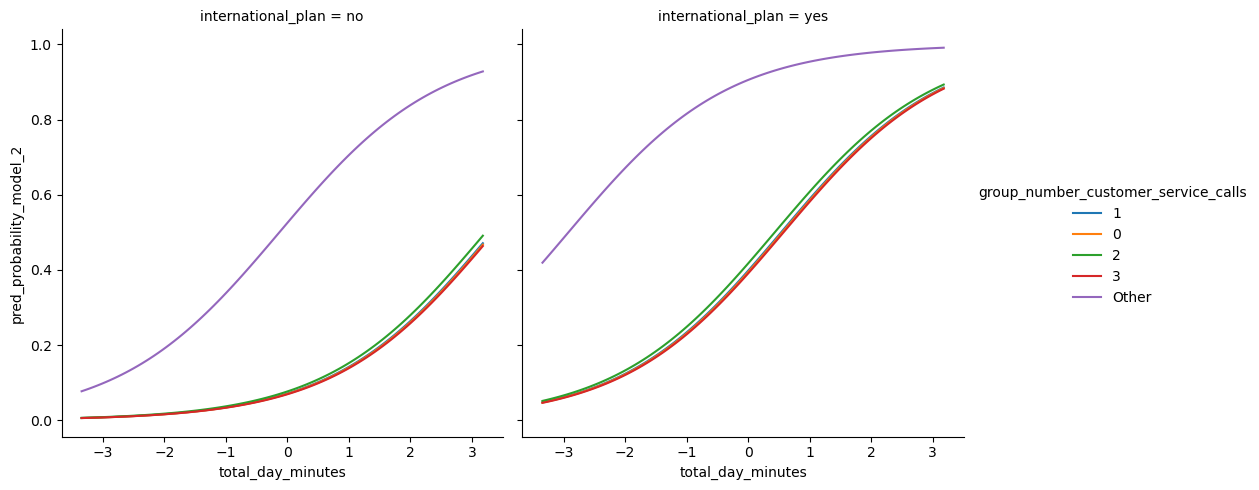

In [199]:
sns.relplot(data = df_viz_mod_2, x='total_day_minutes', y='pred_probability_model_2', hue='group_number_customer_service_calls', col='international_plan',
           kind='line', estimator=None, units='group_number_customer_service_calls')

plt.show()

This model shows a similar story as the previous one, but is a bit different. They are similar in that there seems to be a positive relationship between total_day_min and the probability. However, in this graph it shows that other group of customer service calls starts with a low probability and ends higher when total day min increases (it doesn't start high dip and then shoot back up). When there is NO interantional plan, the slope seems to change than if there was an international plan, but they are both positive. 

### Models: Performance and Validation

Now I will Cross validate three models (the best performing model on the training set, the categorical inputs with linear additive features model, and ALL inputs with INTERACTIONS and linear main effects) to gather more reliable estimate on how these models perform.

import modules needed:

In [200]:
from sklearn.pipeline import Pipeline

In [201]:
from sklearn.model_selection import cross_val_score

In [202]:
from sklearn.model_selection import StratifiedKFold

In [203]:
from sklearn.linear_model import LogisticRegression

In [204]:
from patsy import dmatrices

In [205]:
from sklearn.model_selection import GridSearchCV

I will use a pipeline since I need to preprocess the variables WITHIN FOLDS and it makes this process much easier, but I will perform log transformations beforehand.

In [206]:
churn_df_log_copy = churn_df.copy()

In [207]:
churn_df_log_copy['total_intl_calls'] = np.log(churn_df.total_intl_calls.add(2))

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


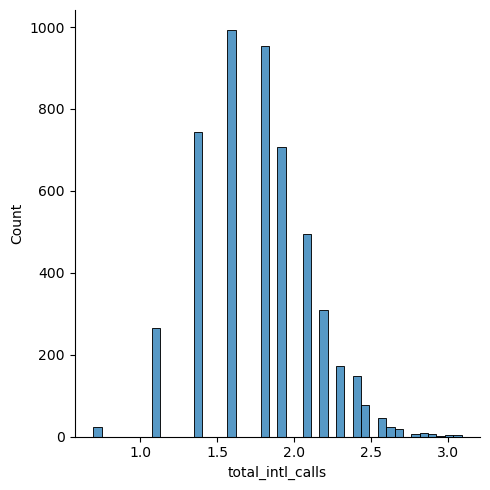

In [208]:
sns.displot(data  = churn_df_log_copy, x='total_intl_calls', kind='hist')

plt.show()

In [209]:
churn_df_log_copy['number_customer_service_calls'] = churn_df_log_copy.number_customer_service_calls.astype('int')

In [210]:
churn_df_log_copy['number_customer_service_calls'] = np.log(churn_df_log_copy.number_customer_service_calls.add(2))

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


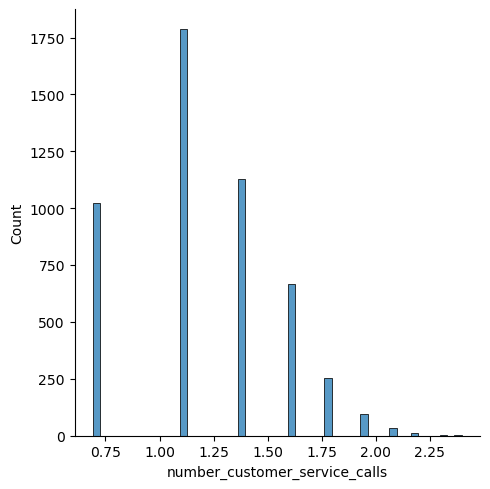

In [211]:
sns.displot(data = churn_df_log_copy, x='number_customer_service_calls', kind='hist')
plt.show()

drop the charge columns since it is correlated 1:1 with minutes so it is unnecessary to put in the data 

In [212]:
churn_df_log_copy = churn_df_log_copy.drop(columns = ['total_day_charge', 'total_night_charge', 'total_eve_charge', 'total_intl_charge'])

Lastly, change churn to a 1 if yes and 0 if no:

In [213]:
churn_df_log_copy['churn'] = np.where(churn_df_log_copy['churn'] == 'yes', 1, 0)

#### Set my 5 kfolds I will use StratifiedKFold since this is CALSSIFICATION problem:

In [214]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

In [215]:
kf.get_n_splits()

5

#### Initialize the sklearn logistic regression, but have to "make" sklearn behave like statsmodels by tunrning off the penalty:

In [216]:
sk_min_loss = LogisticRegression(penalty=None, solver = 'lbfgs', fit_intercept=False, max_iter=25001)

#### Set up my pipeline to standardize within each fold:

In [217]:
log_wflow = Pipeline( steps = [('std_inputs', StandardScaler() ),
                                   ('sk', sk_min_loss) ])

In [218]:
log_wflow

Pipeline(steps=[('std_inputs', StandardScaler()),
                ('sk',
                 LogisticRegression(fit_intercept=False, max_iter=25001,
                                    penalty=None))])

#### Define a function that will cross validate and return only the test set scores:

In [219]:
def logistic_cross_val_score(mod_name, a_formula, init_mod, data_df, cv):
    y, X = dmatrices(a_formula, data = data_df)

    test_res = cross_val_score( init_mod, X, y.ravel(), cv=cv)
 
    res_df = pd.DataFrame({'Accuracy': test_res})
    res_df['fold_id'] = res_df.index + 1
    res_df['model_name'] = mod_name
    res_df['model_formula'] = a_formula
    res_df['num_coefs'] = X.shape[1]

    return res_df

#### Cross validate the first model (the best performing on training set) using the function I just defined, the intialized kfold, the log transformed data, and the pipeline:

In [220]:
formula_list[6]

'churn ~ (group_number_customer_service_calls + bin_number_vmail_messages + international_plan) * (np.sin(total_day_minutes) + np.power(np.sin(total_day_minutes),2)  + np.power(total_day_minutes, 2) + np.power(total_day_minutes,3) + total_intl_minutes) + total_day_minutes + account_length + total_night_minutes + total_eve_minutes + total_intl_calls + total_day_calls + total_night_calls'

In [221]:
cv_result_model_1 = logistic_cross_val_score( 6, formula_list[6], init_mod = log_wflow, data_df = churn_df_log_copy, cv = kf)

In [222]:
cv_result_model_1

Accuracy  fold_id  model_name  \
0     0.880        1           6   
1     0.901        2           6   
2     0.896        3           6   
3     0.896        4           6   
4     0.895        5           6   

                                       model_formula  num_coefs  
0  churn ~ (group_number_customer_service_calls +...         55  
1  churn ~ (group_number_customer_service_calls +...         55  
2  churn ~ (group_number_customer_service_calls +...         55  
3  churn ~ (group_number_customer_service_calls +...         55  
4  churn ~ (group_number_customer_service_calls +...         55

#### Now Cross validate the second model (linear additive of categorical inputs):

In [223]:
formula_list[1]

'churn ~ area_code + international_plan  + group_number_customer_service_calls + bin_number_vmail_messages + bin_total_intl_calls'

In [224]:
cv_result_model_2 = logistic_cross_val_score( 1, formula_list[1], init_mod = log_wflow, data_df = churn_df_log_copy, cv = kf)

In [225]:
cv_result_model_2

Accuracy  fold_id  model_name  \
0     0.846        1           1   
1     0.832        2           1   
2     0.841        3           1   
3     0.843        4           1   
4     0.842        5           1   

                                       model_formula  num_coefs  
0  churn ~ area_code + international_plan  + grou...         13  
1  churn ~ area_code + international_plan  + grou...         13  
2  churn ~ area_code + international_plan  + grou...         13  
3  churn ~ area_code + international_plan  + grou...         13  
4  churn ~ area_code + international_plan  + grou...         13

#### Lastly, cross validate the last model (ALL inputs interactions and linear additive features):

In [226]:
formula_list[5]

'churn ~ (voice_mail_plan + area_code + international_plan + group_number_customer_service_calls) * (account_length + total_day_minutes + total_day_calls + total_eve_minutes + total_eve_calls + total_night_minutes + total_night_calls + total_intl_minutes + total_intl_calls)'

In [227]:
cv_result_model_3 = logistic_cross_val_score( 5, formula_list[5], init_mod = log_wflow, data_df = churn_df_log_copy, cv = kf)

In [228]:
cv_result_model_3

Accuracy  fold_id  model_name  \
0     0.761        1           5   
1     0.794        2           5   
2     0.814        3           5   
3     0.812        4           5   
4     0.827        5           5   

                                       model_formula  num_coefs  
0  churn ~ (voice_mail_plan + area_code + interna...         90  
1  churn ~ (voice_mail_plan + area_code + interna...         90  
2  churn ~ (voice_mail_plan + area_code + interna...         90  
3  churn ~ (voice_mail_plan + area_code + interna...         90  
4  churn ~ (voice_mail_plan + area_code + interna...         90

#### Concat all these results together to visualize:

In [229]:
cv_results_df = pd.concat([cv_result_model_1, cv_result_model_2, cv_result_model_3], ignore_index=True)

In [230]:
cv_results_df

Accuracy  fold_id  model_name  \
0      0.880        1           6   
1      0.901        2           6   
2      0.896        3           6   
3      0.896        4           6   
4      0.895        5           6   
5      0.846        1           1   
6      0.832        2           1   
7      0.841        3           1   
8      0.843        4           1   
9      0.842        5           1   
10     0.761        1           5   
11     0.794        2           5   
12     0.814        3           5   
13     0.812        4           5   
14     0.827        5           5   

                                        model_formula  num_coefs  
0   churn ~ (group_number_customer_service_calls +...         55  
1   churn ~ (group_number_customer_service_calls +...         55  
2   churn ~ (group_number_customer_service_calls +...         55  
3   churn ~ (group_number_customer_service_calls +...         55  
4   churn ~ (group_number_customer_service_calls +...         55  
5   churn ~ area_code + international_plan  + grou...         13  
6   churn ~ area_code + international_plan  + grou...         13  
7   churn ~ area_code + international_plan  + grou...         13  
8   churn ~ area_code + international_plan  + grou...         13  
9   churn ~ area_code + international_plan  + grou...         13  
10  churn ~ (voice_mail_plan + area_code + interna...         90  
11  churn ~ (voice_mail_plan + area_code + interna...         90  
12  churn ~ (voice_mail_plan + area_code + interna...         90  
13  churn ~ (voice_mail_plan + area_code + interna...         90  
14  churn ~ (voice_mail_plan + area_code + interna...         90

#### Visualize the 95% CI for each model's AVERAGE accuracy:

C:\Users\Ethan Lapaczonek\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


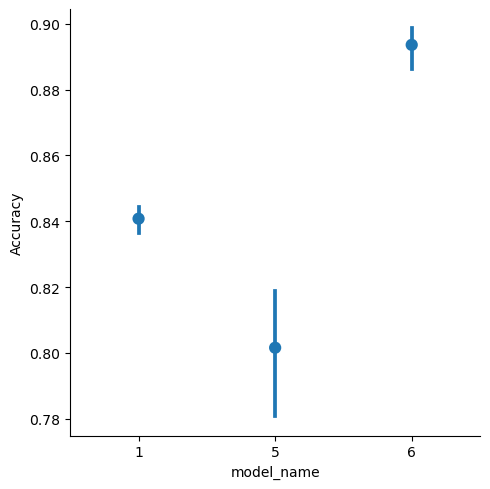

In [231]:
sns.catplot(data = cv_results_df, x='model_name', y='Accuracy', kind='point', join=False,
           errorbar=('ci',95))

plt.show()

Model 6 performs the best on the test set. This model is NOT different from the best performing model on the test set.

In [232]:
cv_results_df.loc[cv_results_df.model_name == 6, :]

Accuracy  fold_id  model_name  \
0     0.880        1           6   
1     0.901        2           6   
2     0.896        3           6   
3     0.896        4           6   
4     0.895        5           6   

                                       model_formula  num_coefs  
0  churn ~ (group_number_customer_service_calls +...         55  
1  churn ~ (group_number_customer_service_calls +...         55  
2  churn ~ (group_number_customer_service_calls +...         55  
3  churn ~ (group_number_customer_service_calls +...         55  
4  churn ~ (group_number_customer_service_calls +...         55

There are 55 coefficients estimated in this model.